<center>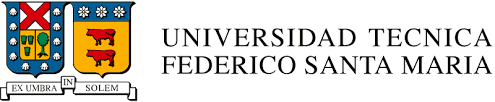</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF-398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM


**Formalidades**  
* Equipos de trabajo de 3 personas (*Los estudiantes deben estar preparados para presentar la tarea el día de la entrega*)
* El entregable debe ser un _Jupyter Notebook_ incluyendo los códigos utilizados, los resultados, los gráficos realizados y comentarios. Debe seguir una estructura similar a un informe (se debe introducir los problemas a trabajar, presentar los resultados y discutirlos), se penalizará fuertemente ausencia de comentarios, explicaciones de gráficos, _etc_. Las preguntas que deben responder se encuentran especificadas explícitamente con letras, ejemplo a) b) c), por lo tanto cualquier pregunta que se encuentre incompleta será penalizada con descuento del puntaje. Recuerde que los códigos presentes en este documento son solo una guía de referencia, por lo tanto no necesariamente funcionan, usted debe mostrar todos sus conocimientos aprendidos a lo largo de la carrera para que su código funcione como se espera. Si lo prefiere puede entregar un _Jupyter Notebook_ por pregunta o uno por toda la tarea, con tal de que todos los entregables esten bien identificados y se encuentren en el mismo repositorio de _Github_.
* Se debe preparar una presentación del trabajo realizado y sus hallazgos. El presentador será elegido aleatoriamente y deberá apoyarse en el _Jupyter Notebook_ que entregarán. 
* Formato de entrega: envı́o de link del repositorio en _Github_, al correo electrónico de los ayudantes (<sebastian.sanchezl@sansano.usm.cl>), en copia al profesor (<cvalle@inf.utfsm.cl>). Especificar el siguiente asunto: [INF-398-2023-1 Tarea 1]. Invitar como colaborador a los usuarios de github "ssanchezl" para poder acceder al repositorio en caso de ser privado.

* Fecha de presentaciones 12 de Mayo, en horario de clases.
* Fecha de entrega: 13 de Mayo. Hora límite de entrega: 12:00 p.m. Cualquier _commit_ luego de la hora límite no será evaluado. Se realizará descuento por atrasos en envío del mail igualmente.  

<hr style="height:2px;border:none"/>

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC

# 1. Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Lo primero es obtener los datos, para esto se pueden descargar los archivos directamente de la página de Kaggle a través del link de la descripción de arriba.

Existen distintas formas para obtener los datos, de las cuales usted debe elegir solo uno:

1. Puede descargarlos y guardarlos en su directorio local y luego cargar los datos usando este notebook con Jupyter.

2. Puede utilizar google colab. En este caso existen 2 formas de cargar los datos, montando su cuenta de google drive en el colab y guardar los datos en una carpeta de drive. La otra forma es cargar los datos de forma en la máquiva virtual que le asigna colab de manera **temporal**. Tenga cuidado si elige la forma temporal ya que si por alguna razón se desconecta del ambiente, deberá volver a descargar los datos.

3. Existen muchas otras formas más pero usted puede obtener los datos con cualquier método que estime conveniente.


También es posible descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle siguiendo las instrucciones en la sección API credentials. Si desea utilizar google colab puede seguir este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

### 1.1.1 Exploración del conjunto de datos




In [2]:
data = pd.read_csv('files/SeoulBikeData.csv',encoding= 'unicode_escape')

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [4]:
# Revisión rápida de las dimensiones del dataframe
data.shape

(8760, 14)

#### **Explore el conjunto de datos y responda  brevemente las siguiente preguntas:**

> **a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?**
- Las variables con valores númericos son Date, Rented Bike Count, Hour, Temperature(°C), Humidity(%), Wind speed(m/s), Visibility(10m), Dew point Temperature, Solar Radiation, Rainfall(mm) y Snowfall(cm).
- Las variables con valores categóricos son Seasons, Holiday y Functioning Day.

> **b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?**
_Date_ y _Season_ se relacionan, pues _Seasons_ se puede inferir de _Date_, ya que son de conocimiento común las fechas exactas en las que empiezan y terminan cada "Season". Por lo tanto son datos dependientes y redundantes, mas puede servir para ayudar la comprensión.

> **c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.**
No faltan valores en el conjunto de datos, pues como se ve en la tabla de la siguiente casilla, no existen datos nulos en todas las columnas.

In [5]:
# Función entregada por el querido ayudante :)
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    temp_ps['MinValue'] = data.min()
    temp_ps['MaxValue'] = data.max()
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage,MinValue,MaxValue
Date,object,8760,365,0,0.0,01/01/2018,31/12/2017
Rented Bike Count,int64,8760,2166,0,0.0,0,3556
Hour,int64,8760,24,0,0.0,0,23
Temperature(°C),float64,8760,546,0,0.0,-17.8,39.4
Humidity(%),int64,8760,90,0,0.0,0,98
Wind speed (m/s),float64,8760,65,0,0.0,0.0,7.4
Visibility (10m),int64,8760,1789,0,0.0,27,2000
Dew point temperature(°C),float64,8760,556,0,0.0,-30.6,27.2
Solar Radiation (MJ/m2),float64,8760,345,0,0.0,0.0,3.52
Rainfall(mm),float64,8760,61,0,0.0,0.0,35.0


In [6]:
def barplots(x,y,hue):
    plt.figure(figsize=(15,7))
    sns.set_palette("husl")
    if hue:
        sns.barplot(x=x,y=y,hue=hue,data=data)
    else:
        sns.barplot(x=x,y=y,data=data)
    plt.title(f"Estimación central de {x} vs {y}")

### 1.1.2 Exploración de Features

> **a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.**
* Respuesta redactada al final de los gráficos ⬇️⬇️⬇️


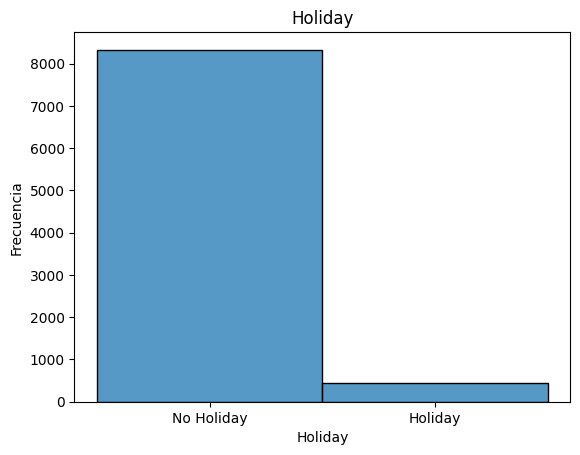

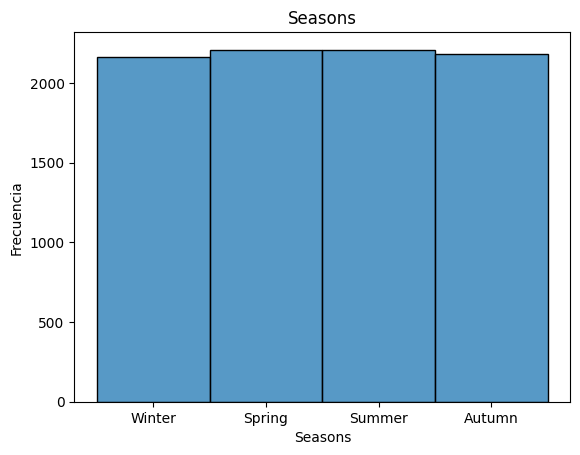

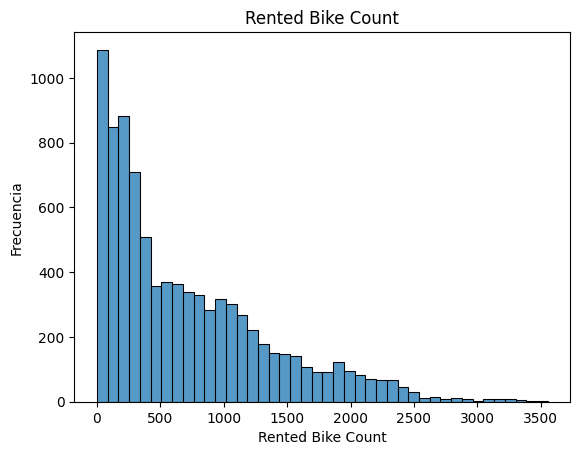

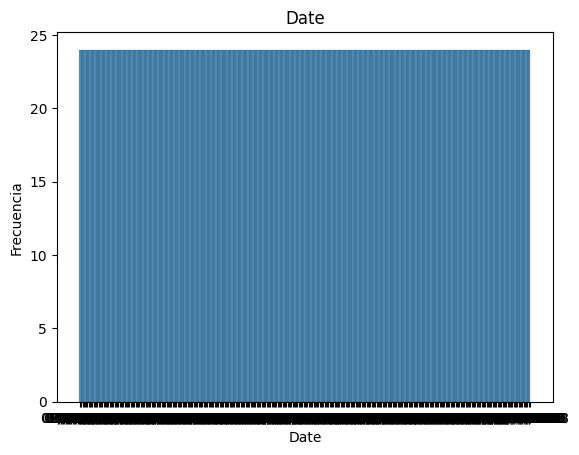

In [7]:
# Estos gráficos son para responder la pregunta a)
cat_features = data[['Holiday', 'Seasons', 'Rented Bike Count', 'Date']]
for i in cat_features:
    
    sns.histplot(data=data, x=i)
    plt.title(i)
    plt.xlabel(i)
    plt.ylabel("Frecuencia")
    plt.show()

Analizando cada gráfico por separado, podemos notar en primer lugar que en el gráfico _"Holiday vs Frecuencia"_, tenemos una gran disparidad entre la cantidad de datos, lo cual es generado dado que hay muchos más días no festivos que festivos. Esto se puede deducir del conocimiento común de que durante el año hay más días normales que días festivos.

Analizando el gráfico de _"Seasons vs Frecuencia"_, notamos que la proporción es homogénea, es decir, existe una cantidad de datos similar entre las clases, por lo que se puede decir que la cantidad de registros es equitativo en el transcurso de las seasons.

Analizando el gráfico de _"Date vs Frecuencia"_, a pesar que tenemos una enorme cantidad de datos, al punto que no son visualizables en el eje horizontal, notamos que existen 24 registros todos los días.

Finalmente, en el gráfico de _"Rented Bike Count vs Frecuencia"_, notamos que existe una tendencia a la baja de cantidad de bicicletas arrendadas por período, es decir, es más normal que se arrienden pocas bicicletas en un periodo a que se arrienden muchas. Notamos además que la normalidad de arriendos está entre 0 y 2000, donde la cantidad de arriendos por periodo superior a 2500 es sumamente extraño. 


#### **Una vez analizado lo anterior responda las siguientes preguntas:**

> **b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?**

Viendo el gráfico de _"Holiday vs Rented Bike Count"_, es obvio decir que hay en promedio más arriendos de bicicletas los días no feriados que los feriados, habiendo una diferencia promedio de **200 arriendos** entre estas clases. 

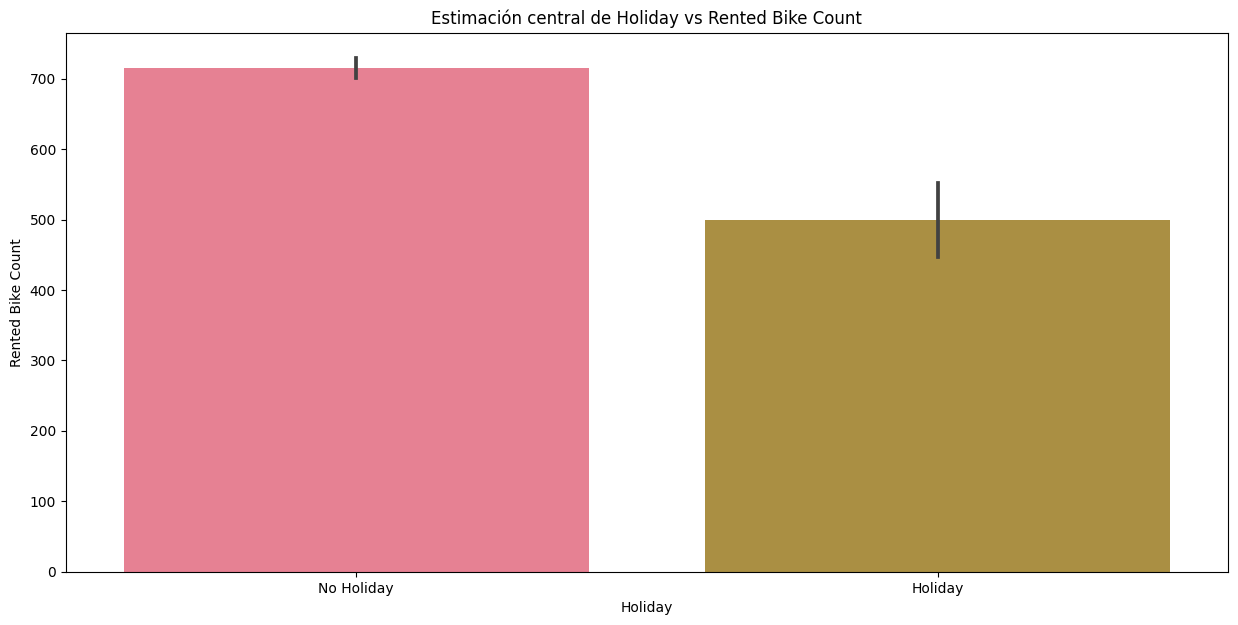

In [9]:
# Código generador de gráfico para la pregunta b)
barplots('Holiday','Rented Bike Count',"")

> **c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?**

Considerando el gráfico de _"Days of the week vs Rented Bike Count"_, donde los números del eje horizontal van desde 0 a 6, representando los días de la semana respectivamente (donde 0 es el lunes, 1 es martes y así sucesivamente hasta 6 ser el domingo); notamos que no hay una gran diferencia en promedio de los arriendos de bicicletas durante la semana, a excepción de los domingos, siendo el único día que tiene un ligero menor promedio de arriendos respecto a los demás días. Por lo tanto, no hay mucho que destacar en la distribución de arriendos en la semana, mas que el rango de bicicletas arrendadas se encuentra entre **600 y 750 en promedio**. 

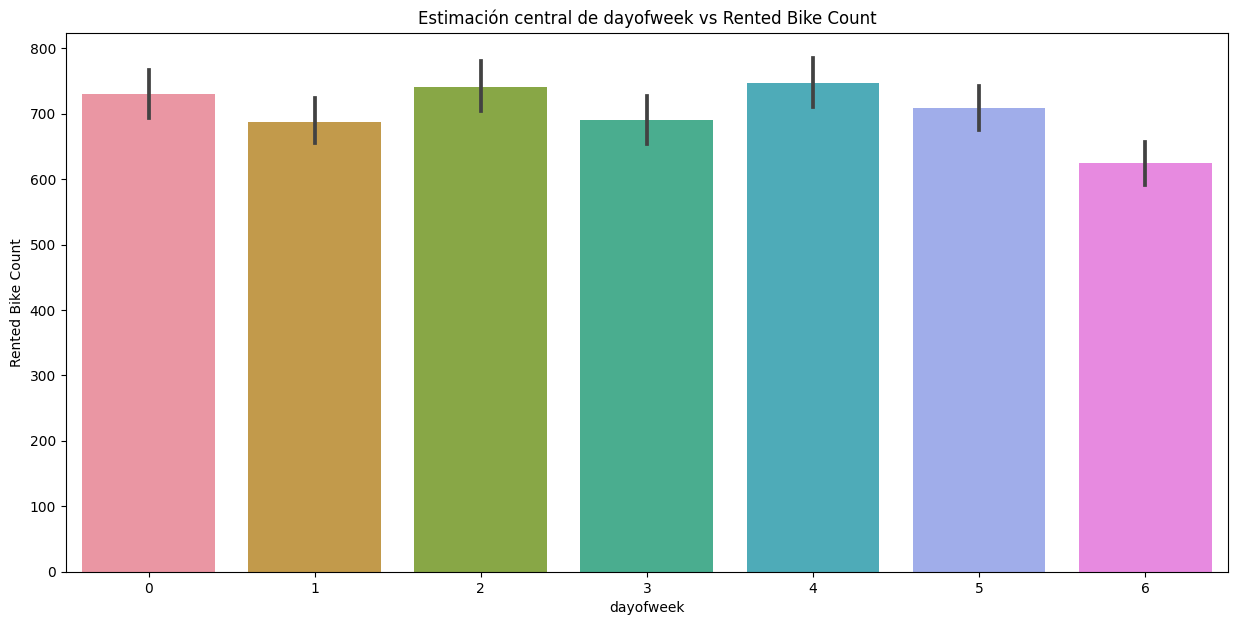

In [10]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['dayofweek'] = data['Date'].dt.dayofweek

# Código generador de gráfico para la pregunta c)
barplots('dayofweek','Rented Bike Count',"")
data.drop('dayofweek', axis=1, inplace=True)

> **d) ¿De qué forma afecta el clima al arriendo de bicicletas?**

Para poder realizar un análisis del clima es necesario revisar las variables que están directamente relacionadas con el estado climático, como lo son _Temperature(°C)_, _Humidity(%)_, _Wind speed (m/s)_, _Visibility (10m)_, _Dew point temperature(°C)_, _Solar Radiation (MJ/m2)_, _Rainfall(mm)_ y _Snowfall (cm)_.

En el código que se encuentra en la siguiente casilla, se muestran diferentes gráficos de barras entre _Rented Bike Count_ y las variables del clima. De estos gráficos se puede concluir:

- **Temperatura:** las temperaturas entre 0 °C y 25 °C son el rango preferido para arrendar bicicletas, donde existe una relación entre mayores temperaturas mayor es la cantidad de bicicletas arrendadas, pero posterior a los 25 °C esta relación se vuelve inversamente proporcional, es decir, disminuye a mayor temperatura. Con temperaturas inferiores a 0 °C se reducen drásticamente la cantidad de bicicletas arrendadas en comparación a los rangos anteriormente mencionados.

- **Humedad:** se pueden observar 2 comportamientos en la gráfica, el primero que va desde 10% a 50% de humedad se puede observar una relación directa, llegando a un máximo justamente en 50%, aproximadamente. Posterior a este valor, se observa una relación inversamente proporcional, es decir disminuye la cantidad de bicicletas arrendadas a mayores niveles de humedad. Es destacable el extraño comportamiento entre humedades de 0% y 10% (posiblemente por la falta de datos en estos valores de humedad).

- **Velocidad del viento:** de 0 m/s a 2 m/s existe un gran incremento en la cantidad de bicicletas arrendadas, alcanzando su máximo en este valor de velocidad del viento. Posterior a este valor, la cantidad de bicicletas arrendadas empieza a disminuir paulatinamente.

- **Visibility:** en el gráfico no es claro el efecto que tiene este factor en la cantidad de bicicletas arrendadas, pues las barras son muy intermitentes y cambiantes en su altura, por lo que no se puede identificar un patrón claro.

- **Temperatura de rocio:** desde -30°C hasta 15°C existe una relación directa entre el aumento de temperatura y la cantidad de bicicletas arrendadas, encontrando su punto más alto. Posterior al rango disminuye ligeramente y de golpe se vuelven casi nulas las bicicletas arrendadas cerca de los 30°C. Extrañamente, en el gráfico se ve un alza repentina cuando la temperatura es igual a 0 °C y, de hecho, es la temperatura en la que se arrendó la mayor cantidad de bicicletas.

- **Radiacion solar:** entre 0 y 0,8 (Mj/m2) aproximadamente se arrienda una alta y constante cantidad de bicicletas. Posterior a este número, el número de bicicletas arrendadas disminuye considerablemente.

- **Lluvia y Nieve:** tanto como cuando llueve y nieva se arriendan muy pocas bicicletas, prefiriéndose arrendar bicicletas días sin estos fenómenos climáticos o con muy bajos niveles.

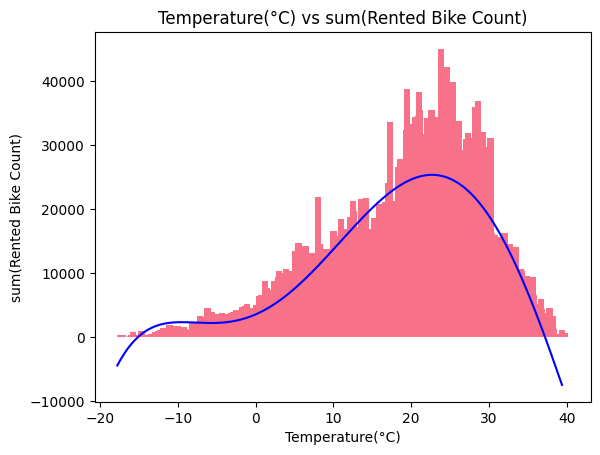

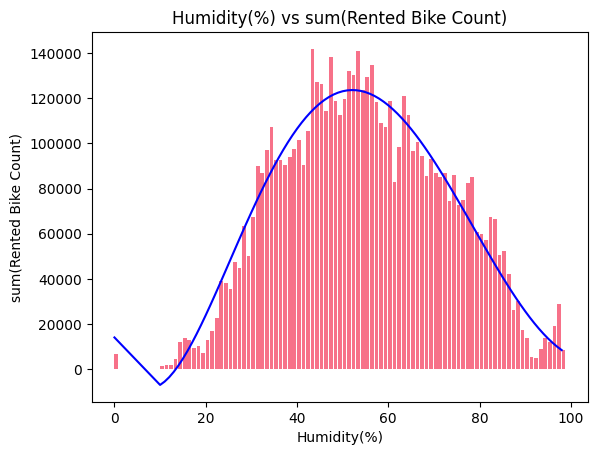

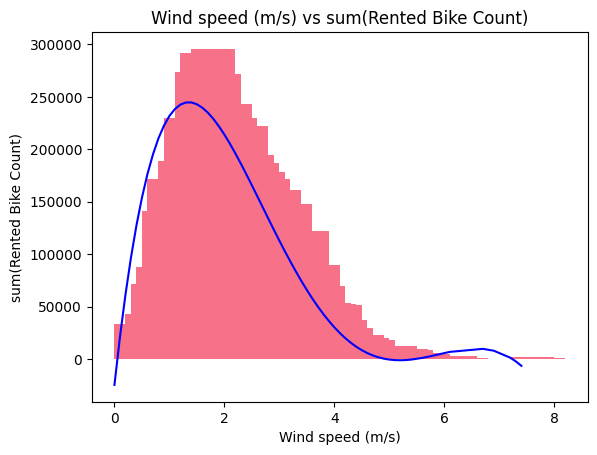

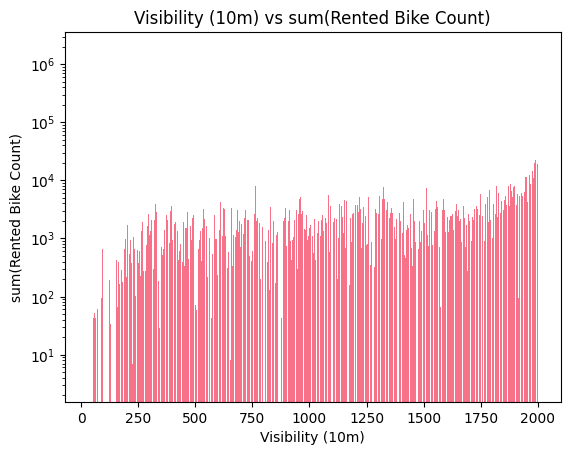

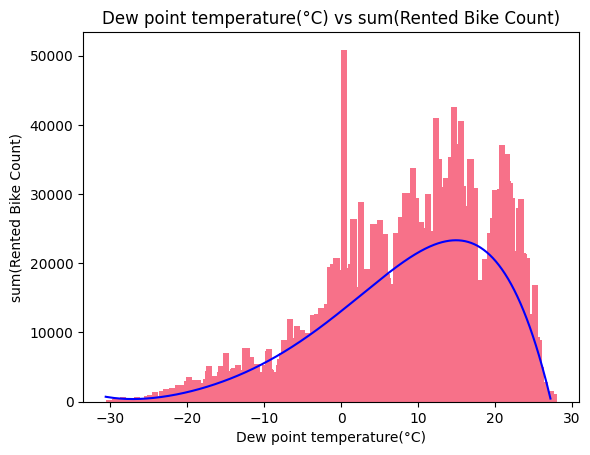

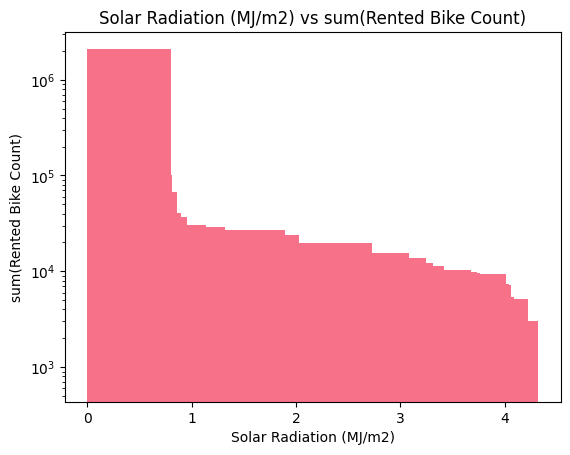

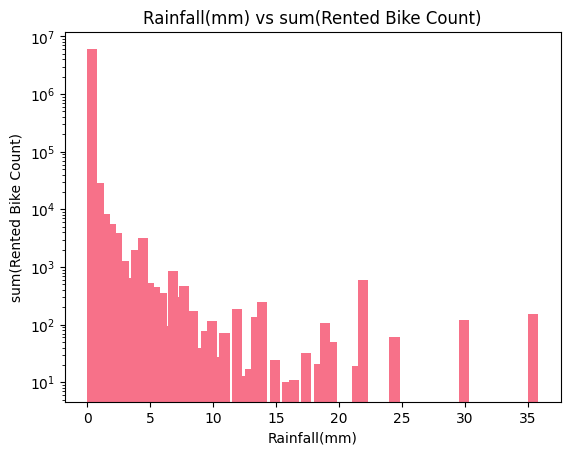

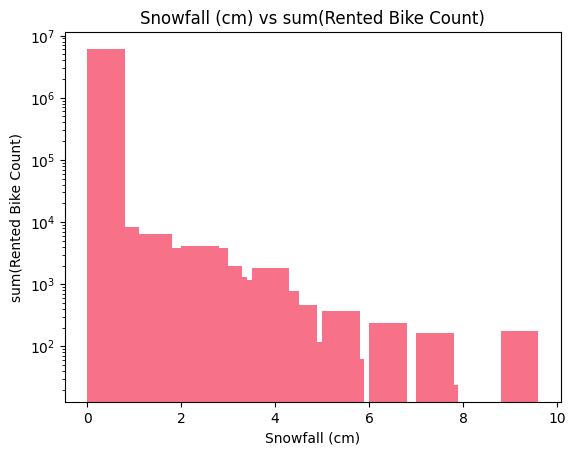

In [11]:
# Código generador de gráficos para la pregunta d)
columns = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Crear un gráfico de dispersión para cada par de columnas
for col in columns:
    aux_df = data.groupby(col)['Rented Bike Count'].sum()
    if col in ['Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
        plt.bar(aux_df.index, aux_df.values, align="edge", log=True)
    else:
        plt.bar(aux_df.index, aux_df.values,align="edge")
        z = np.polyfit(aux_df.index, aux_df.values, 5)
        p = np.poly1d(z)
        # Display the Trendline
        plt.plot(aux_df.index, p(aux_df.index), "blue")

    plt.xlabel(col)
    plt.ylabel('sum(Rented Bike Count)')
    plt.title(f"{col} vs sum(Rented Bike Count)")
    plt.show()

> **e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').**

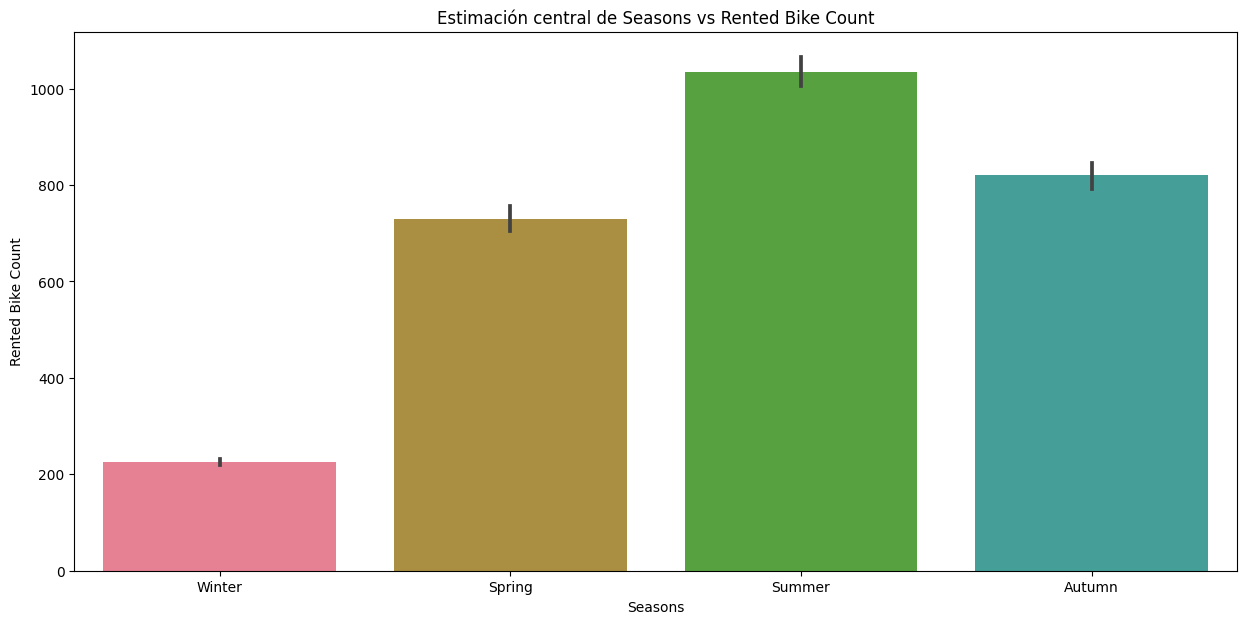

In [12]:
# Código generador de gráfico para la pregunta e)
barplots('Seasons','Rented Bike Count',"")

#### Responda las siguientes preguntas:

> **f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?**
Se ve que el invierno es la clase menos preferida para arrendar y el verano donde más se arriendan. A medida que las estaciones transcurren, disminuye el promedio de arriendos desde el verano hasta el invierno, y desde el invierno hasta el verano aumenta la cantida de bicicletas arrendadas. 

> **g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.**
* Hecho 👍

In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['dayofweek'] = data['Date'].dt.dayofweek

In [14]:
data.drop('Date', axis=1, inplace=True)

> **h) Grafique y analice de forma general la correlación entre las variables *numéricas*.**

<AxesSubplot: >

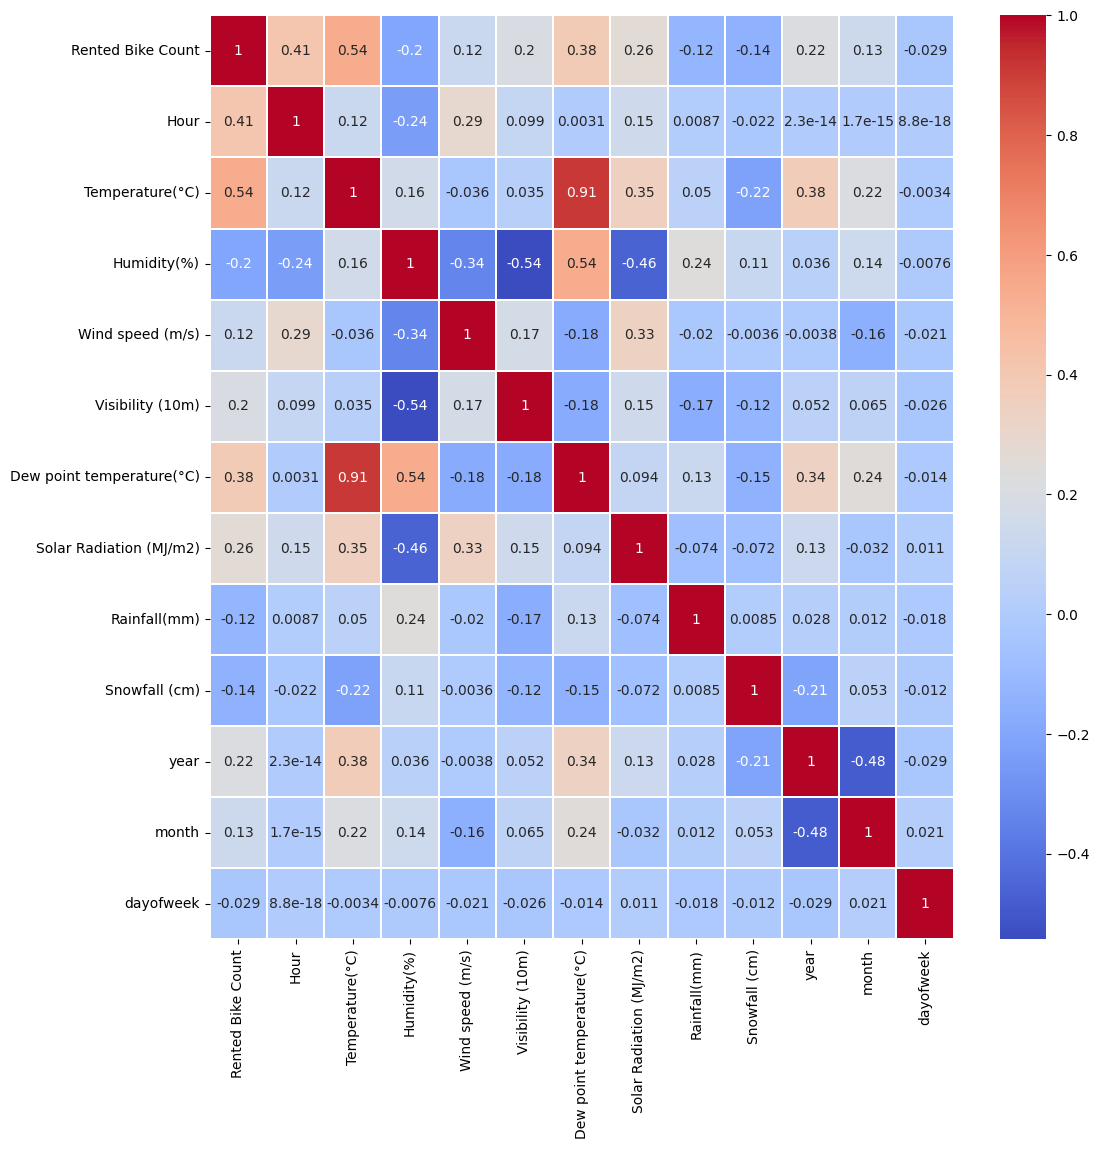

In [15]:
data_corr = data.corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')

> **i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)**

Entre todas las relaciones existentes, como grupo consideramos que las siguientes variables tienen un peso lo suficientemente grande como para ser mencionadas. Además, las dividimos en dos categorías, aquellas que están fuertemente correlacionadas y aquellas que lo estan débilmente. 

- **Correlación fuerte:** dentro de la matriz se considerará una correlación fuerte los valores en el rango ±(0.70 a 1), donde las variables que alcanzan este valor son _Dew point Temperature_ y _Temperature_, teniendo una correlación de 0.91, muy cercana a una relación lineal.

- **Correlación débil:** corresponde a los valores que están en elrango de correlación ±(0.33 a 0.70), donde se pueden destacar las correlaciones de _Humedad_ con _Wind Speed_, _Visibility_, _Dew point Temperature_ y _Solar Radiation_. Esto nos da a entender que la _Humedad_ es una variable importante para entender el resto de las condiciones climáticas. Por otro lado, nuestra variable objetivo se correlaciona débilmente con la temperatura y la hora. Esto tiene sentido considerando que la temperatura se correlaciona con otras variables de relativa importancia para la variable objetivo, tal como _Dew point Temperature_.

A pesar de lo antes mencionado, a razgos generales se puede ver una baja relación lineal entre las variables, por lo que, tras modelar, hay que tener en consideración esto a la hora de analizar los resultados.

### 1.1.3 Separación de conjuntos

> **a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.**

In [16]:
X = data.drop('Rented Bike Count',axis=1)
y = data['Rented Bike Count'] 

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle = True, random_state=0)

> **a) ¿Para qué es el parámetro stratify?**

Aquí entendemos que _stratify_ es un método para dividir el conjunto de datos conservando la proporción original en base a una columna, normalmente el objetivo. Pero si el objetivo es una variable numérica, donde hay muchas clases con sólo un único valor, stratify tiene un error, ya que como condición necesita al menos 2 valores por clase. 

> **b) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.**

In [18]:
le = preprocessing.LabelEncoder()
X_train["Seasons"] = le.fit_transform(X_train["Seasons"])
X_train["Holiday"] = le.fit_transform(X_train["Holiday"])
X_train["Functioning Day"] = le.fit_transform(X_train["Functioning Day"])

_Label Encoder_ se encarga de transformar variables categóricas de tener como valor un texto a tener como valor una etiqueta numérica, partiendo del 0 e incrementando en 1 para cada etiqueta. Por ejemplo, para el caso de la variable "Holiday", la categoría "Holiday" pasa a tomar valor 0 y la categoría "No Holiday" pasa a ser 1. Esto se hace para que la máquina pueda interpretar los valores de las variables categóricas.

En cuanto al cómo se usa, consiste netamente en asignar un valor numérico a cada categoría de una variable categórica.

> **c) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.**

In [19]:
X_test["Seasons"] = le.fit_transform(X_test["Seasons"])
X_test["Holiday"] = le.fit_transform(X_test["Holiday"])
X_test["Functioning Day"] = le.fit_transform(X_test["Functioning Day"])

> **d) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?**

Es debido a que _Label Encode_r es una técnica para asignar valor numérico a los valores de una variable categórica. Si realizácemos esto a una variable numérica no tendría fundamento, pues sólo enumeraría los distintos tipos de valores haciendo que pierdan el sentido y relaciones originales que tenían. Es por esto que no se puede aplicar a todo el conjunto de datos, pues este cuenta tanto con variables de tipo numérica y categórica. 

## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_ y _Holiday_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> **a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.**

In [20]:
#Regresor entrenado con datos en bruto
reg = LinearRegression().fit(X_train, y_train)

In [21]:
#Vector de valores predichos por el regresor
y_pred = reg.predict(X_test)
y_pred

array([ 4.24107914e+02,  7.87272654e+02,  5.45651472e+02,  3.56901148e+02,
        1.37153849e+03,  5.78823753e+02,  9.70534745e+02,  4.56932696e+02,
        1.46963382e+03, -4.44809268e+01,  7.43370812e+02,  5.91161376e+02,
        2.05564744e+02,  6.08307176e+00,  5.67588240e+02,  1.12000773e+03,
        7.25707210e+02, -6.44650221e+01,  5.00354865e+02,  1.16088469e+03,
        7.69399209e+02,  5.51014260e+02,  7.68818640e+02, -2.22242261e+02,
        4.79391693e+02,  7.33616725e+02,  9.15627542e+02,  5.74018523e+02,
        8.58217519e+02,  2.39443115e+02,  7.03579653e+02,  5.20668705e+02,
        4.28043204e+02,  1.02778029e+03,  5.52256535e+02,  7.56080757e+01,
        4.43164930e+02,  9.45438858e+02,  7.99035643e+02,  7.15430104e+02,
        9.54959848e+02,  9.87186413e+02,  1.44896543e+03,  1.51267950e+03,
        6.09023262e+02,  6.16949617e+02,  3.98248821e+02,  6.15348175e+02,
        4.20108854e+02, -5.54354038e+02,  2.18656798e+02,  1.19148316e+01,
        1.10564735e+03,  

> **b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test***

In [22]:
mean_squared_error(y_test, y_pred)

192438.53027474895

El error cuadrático obtenido es muy grande, por lo que las predicciones realizadas por el regresor son muy distantes del valor real en el conjunto de datos de test.

> **c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)**

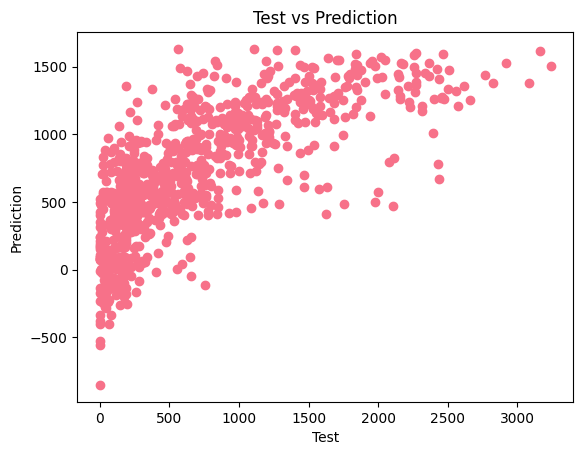

In [23]:
plt.scatter(y_test, y_pred)

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

En un caso ideal, en donde el regresor tenga una alta capacidad predictiva con valores de error cercano a 0, se esperaría observar en el gráfico los puntos distribuidos a lo largo de una recta con pendiente 0.5, es decir que cada valor de _Test_ es prácticamente igual al valor de _Prediction_.

Ahora, lo que se observa en este caso es que no existe esta relación mencionada y la tendencia se asemeja a una relación logarítmica. Además, tenemos valores negativos en la predicción (no tienen sentido real) y la nube de datos presenta una gran varianza. Particularmente, se puede apreciar en el gráfico que para un valor del conjunto de test igual a 0 (caso real), los valores predichos se encuentran en un rango entre -1000 y 1000, aproximadamente.  

### 1.2.2 Modelo preprocesado

#### Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var\_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var\_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) **¿Por qué no simplemente usar solo el seno o solo el coseno?**

Como tenemos las necesidad de representar variables cíclicas, en donde la distancia entre la primera y última clase sea la misma que la distancia entre dos variables contiguas. Para poder hacer esta representación es necesario encontrar una funcion cíclica y sabemos que con el uso de seno y coseno obtenemos esto. Ahora bien, si usamos sólo una de las variables, obtenemos una funcion periódica. Esto también se puede imaginar gráficamente, ya que si graficamos con dos variables seno y coseno, cuyos valores periodicos van entre 1 y -1, generaremos un círculo cíclico de coordenadas (x,y), donde por ejemplo (0,1) sea el primer valor y (-1,0), sea el último valor, de esta forma su distancia es de $\sqrt{(0+1)^2+(-1-0)^2)}=\sqrt{2}$, que será la misma distancia entre el primero y el segundo valor. Mas si sólo lo hacemos con una variable en cualquier eje, sólo tendríamos una recta entre 1 y -1.

In [24]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)
X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)
X_train['dayofweek_sin'] = np.sin(2 * np.pi * X_train['dayofweek'] / 7)
X_train['dayofweek_cos'] = np.cos(2 * np.pi * X_train['dayofweek'] / 7)

X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)
X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)
X_test['dayofweek_sin'] = np.sin(2 * np.pi * X_test['dayofweek'] / 7)
X_test['dayofweek_cos'] = np.cos(2 * np.pi * X_test['dayofweek'] / 7)


X_train.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)
X_test.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)

#### Estación

> **b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.**

In [25]:
X_train['Season_Sin'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['Season_Cos'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

In [26]:
X_test['Season_Sin'] = np.sin(2 * np.pi * X_test['Seasons'] / 4) 
X_test['Season_Cos'] =  np.cos(2 * np.pi * X_test['Seasons'] / 4)
X_test.drop('Seasons', axis=1, inplace=True)

#### Normalización de variables.

> **c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.**

In [27]:
X_scaler = preprocessing.StandardScaler() #se crea un normalizador de distrbucion estandar para X
y_scaler = preprocessing.StandardScaler() #Lo mismo aquí, pero para Y


cols_to_normalize = ['Temperature(°C)', 
                     'Humidity(%)', 
                     'Wind speed (m/s)', 
                     'Visibility (10m)', 
                     'Dew point temperature(°C)', 
                     'Solar Radiation (MJ/m2)',	
                     'Rainfall(mm)',	
                     'Snowfall (cm)',
                     'year']

X_train[cols_to_normalize] = X_scaler.fit_transform(X_train[cols_to_normalize]) #Se normaliza con distribucion estandar  
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1)) #se normaliza y redimensiona dejando como vector columna de Dimension Mx1

X_test[cols_to_normalize] = X_scaler.transform(X_test[cols_to_normalize]) #Se normaliza. De nuevo.

> **d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.**

In [28]:
reg = LinearRegression().fit(X_train, y_train)

> **e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.**

In [29]:
y_pred = reg.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[ 6.02581464e+02],
       [ 8.97553927e+02],
       [ 5.99422349e+02],
       [ 2.13915569e+02],
       [ 1.25472095e+03],
       [ 3.99327264e+02],
       [ 1.13010291e+03],
       [ 5.86253219e+02],
       [ 1.32989682e+03],
       [-1.38578133e+02],
       [ 5.68514200e+02],
       [ 6.14076852e+02],
       [ 4.92809096e+02],
       [ 3.05542406e+02],
       [ 4.95005048e+02],
       [ 9.39669359e+02],
       [ 8.90872101e+02],
       [-1.11277762e+02],
       [ 3.22399037e+02],
       [ 1.31665202e+03],
       [ 8.32409782e+02],
       [ 5.82643116e+02],
       [ 6.54629323e+02],
       [-9.47335403e+01],
       [ 4.80392954e+02],
       [ 6.25057381e+02],
       [ 9.12402095e+02],
       [ 5.57850268e+02],
       [ 8.35331211e+02],
       [ 2.79727278e+02],
       [ 5.27601917e+02],
       [ 5.13922394e+02],
       [ 4.77283521e+02],
       [ 9.00907734e+02],
       [ 5.86325988e+02],
       [-1.33748388e+02],
       [ 2.39387754e+02],
       [ 7.91593835e+02],
       [ 7.7

> **f) Calcule el error cuadrático medio en la escala original de bicicletas**

In [30]:
mean_squared_error(y_test, y_pred)

187862.05887942956

> **g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?**

Mejoran, pero muy levemente, considerándose casi despreciable.

> **h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)**

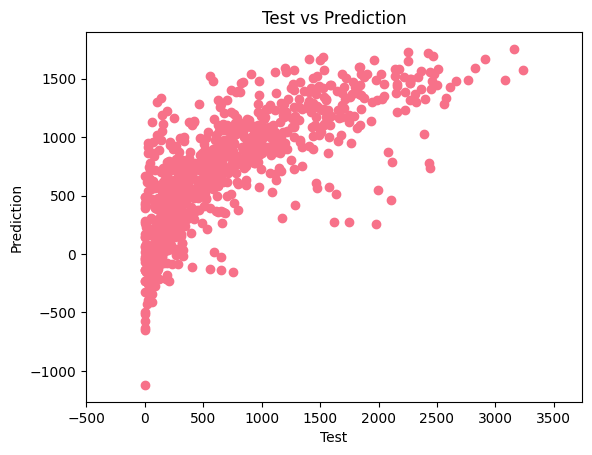

In [31]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

En este gráfico se puede ver una mayor densidad de puntos entorno a una posible función de regresión. Sin embargo, todavía no se puede distinguir una regresión lineal clara, lo que se ve reflejado en el resultado de error cuadrático (todavía existe una gran varianza en los valores circundantes a 0).

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> **a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.**

In [32]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

#### Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> **b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.**

* **loss**: función de pérdida utilizada en la regresión. Los valores permitidos son "squared_loss" (pérdida cuadrática), "huber" (pérdida de Huber) y "epsilon_insensitive" (pérdida insensible a epsilon). Por defecto, el valor es "squared_loss".
* **penalty:** término de regularización utilizado en la regresión. Los valores permitidos son "l2" (norma L2) y "l1" (norma L1). Por defecto, el valor es "l2".
* **alpha:** factor de regularización. Este parámetro controla la fuerza de la regularización. Valores más altos producen una mayor regularización. Por defecto, el valor es 0.0001.
* **l1_ratio:** parámetro de mezcla para la regularización elástica. Cuando el valor es 1, la regularización es L1, cuando es 0, la regularización es L2. Por defecto, el valor es 0.15.
* **fit_intercept:** indica si se debe calcular o no la intersección. Por defecto, el valor es True.
* **max_iter:** número máximo de iteraciones. Por defecto, el valor es 1000.
* **tol:** tolerancia para la convergencia. Por defecto, el valor es 1e-3.
* **shuffle:** indica si se deben mezclar los datos en cada iteración. Por defecto, el valor es True.
* **verbose:** es un parámetro que controla la cantidad de información que se imprime durante el entrenamiento del modelo. Por defecto, el valor es 0.
* **epsilon:** límite de tolerancia para la pérdida insensible a epsilon. Por defecto, el valor es 0.1.
* **learning_rate:** tasa de aprendizaje utilizada en el descenso de gradiente. Los valores permitidos son "constant", "optimal" y "invscaling". Por defecto, el valor es "invscaling".
* **eta0:** tasa de aprendizaje inicial utilizada en el descenso de gradiente. Por defecto, el valor es 0.01.
* **power_t:** exponente utilizado en el descenso de gradiente. Por defecto, el valor es 0.25.
* **early_stopping:** si se debe utilizar la parada temprana para detener el entrenamiento cuando no hay mejora en la validación. Por defecto, el valor es False.
* **validation_fraction:** fracción de datos utilizados para la validación si la parada temprana está habilitada. Por defecto, el valor es 0.1.
* **n_iter_no_change:** número de iteraciones sin mejora en la validación antes de detener el entrenamiento si la parada temprana está habilitada. Por defecto, el valor es 5.
* **warm_start:** si se debe utilizar la solución anterior como punto de partida. Por defecto, el valor es False.
* **average:** si se debe utilizar una media ponderada de las soluciones anteriores. Por defecto, el valor es False.
* **random_state:** semilla aleatoria para la generación de números aleatorios. Por defecto, el valor es None.

> **c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.**

El parámetro *eta0* corresponde al  factor utilizado en las iteraciones del gradiente descendente para controlar la magnitud del salto. Esta factor puede ir variando a través de las iteraciones según lo definido por el parámetro *learning_rate* que, en caso de estar declarado con valor *optimal*, el prámetro *alpha* entra en juego de la siguiente forma:

$$eta_{i+1} = \dfrac{1.0}{alpha \cdot (t + t0)}$$

Donde *t0* es un valor definido por la heurística propuesta por Leon Bottou y *t* corresponde al número de actualizaciones realizadas en los pesos durante el entrenamiento, lo que es equivalente a (n_iter_ * n_samples + 1).

En caso de que el parámetro *learning_rate* tenga cualquiera de los otros valores (_constant_, _invscaling_, _adaptive_) el parámetro *alpha* no es utilizado.

El valor de parámetro *constant* significa que $eta_{i}$ se mantiene constante a lo largo de las iteraciones, es decir:

$$eta_{i+1} = eta_{i}$$

El valor de parámetro *invscaling* indica que el valor de *eta* se va actualizando a lo largo de las iteraciones según:

$$eta = \dfrac{eta0}{t^{power\_t}}$$

Donde *power\_t* es un parámetro entregado a la función.

Por último, el valor de parámetro *adaptive* significa que $eta=eta0$ siempre y cuando la función de perdida siga decreciendo. Si esto no se cumple durante la cantidad de épocas indicado en *n_iter_no_change*, entonces el actual $eta$ es divido por 5. 





In [33]:
reg = SGDRegressor(loss='squared_error',
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   learning_rate = "optimal",
                   alpha = 0.0001,
)

#### Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

> **d) ¿Para qué sirve el *early_stoping*?**

*early_stoping* habilita la condición de término del entrenamiento si no se han mejorado los resultados después de un cierto número de iteraciones en el caso entregado. De esta manera, se evita usar todas las épocas si en una iteración intermedia ya no se encuentran mejoras. 

> **e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?**

Es observable que iniciamos con un enorme error, situación esperable para las primeras iteraciones. Las curvas empiezan a mejorar enormenemte en relación a la maginitud incial hasta aproximadamente la época 75, donde la mejora se estanca en un promedio cercano a 10. Para poder visualizar mejor el error se utilizó una escala logarítmica.


> **f) ¿Cuántas _epochs_ duró su entrenamiento?**
Duró 96 epochs con la semilla utilizada. 

In [34]:
y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop tring if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 96 epochs


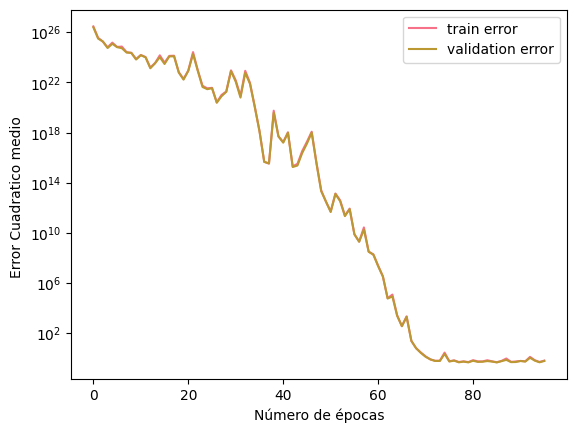

In [35]:
plt.plot(tr_errors, label='train error')
plt.plot(val_errors, label='validation error')
plt.xlabel('Número de épocas')
plt.ylabel('Error Cuadratico medio ')
plt.legend()
plt.yscale('log')
plt.show()

> **g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.**

In [36]:
y_pred = reg.predict(X_test).reshape(-1, 1)

y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[ 7.03654994e+02],
       [ 1.18291745e+03],
       [ 9.73305757e+02],
       [ 1.90200436e+02],
       [ 1.83067184e+03],
       [ 1.66918180e+02],
       [ 1.20497984e+03],
       [ 5.33955097e+02],
       [ 1.40336183e+03],
       [-2.18987716e+02],
       [ 7.33949158e+02],
       [ 5.46419309e+02],
       [ 5.79032661e+02],
       [-1.97066004e+01],
       [ 6.12189028e+02],
       [ 1.18850866e+03],
       [ 1.06693255e+03],
       [-1.56689656e+02],
       [ 2.51496385e+02],
       [ 1.66183043e+03],
       [ 8.30710111e+02],
       [ 8.60445073e+02],
       [ 6.12359675e+02],
       [-1.54296954e+02],
       [ 2.48460279e+02],
       [ 7.29778804e+02],
       [ 1.10232665e+03],
       [ 6.64722298e+02],
       [ 7.44235500e+02],
       [ 8.72045816e+02],
       [ 5.63328215e+02],
       [ 5.35574558e+02],
       [ 2.41513638e+02],
       [ 1.03755572e+03],
       [ 5.21052356e+02],
       [-3.57194092e+02],
       [ 4.88009475e+02],
       [ 9.05666325e+02],
       [ 9.1

> **h) Calcule el error cuadrático medio en la escala original de bicicletas**

In [37]:
mean_squared_error(y_test, y_pred)

268416.64679691097

> **i) ¿Mejoran los resultados con respecto al modelo anterior?**
No, de hecho empeora en aproximadamente 80000 en relación al error del modelo anterior.


> **j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)**

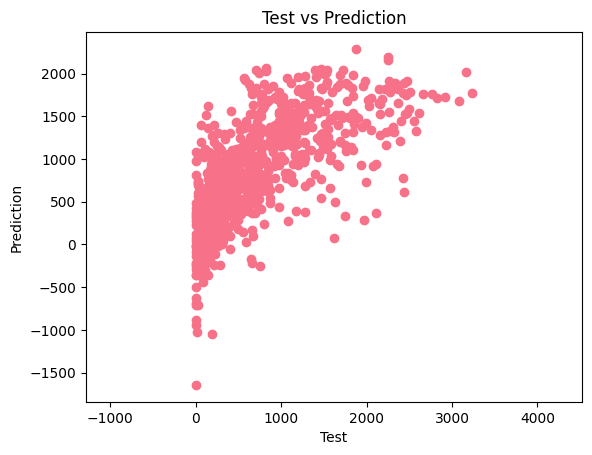

In [38]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con un a paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:


> **a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?**

Los _hiperparámetros_ son parametros que se definen antes del proceso de aprendizaje automatico y son utilizados para regular el comportamiento y entrenamiento mismo del modelo. Por otro lado el hyper tuning, tal como dice su nombre, es el proceso de sintonizar los valores de los hiper parametros con el objetivo de encontar un conjunto optimo para maximizar el rendimiento del modelo. 

> **b) ¿Cuál es la motivación de agregar una penalización al modelo?**

Generar un modelo con mayor robustez, es decir, un modelo que reduce el sobreajuste al penalizar coeficientes grandes y por tanto reduciendo la varianza del modelo. De esta forma, se ayuda a mejorar la capacidad generalizadora a nuevos datos de entrada.

> **c) ¿De qué se compone la penalización mediante regularización Ridge?**

Ridge utiliza una penalizacion de norma L2, es decir, penaliza los valores cuadrados de los ccoeficientes del modelo. Esta se compone de alpha, que es el factor de regularizacion y de los coeficientes cuadrados que se ajustan para minimizar la funcion de costo. En otras palabras, la regularizacion de ridge agrega restriccion en cuanto a los valores que puede tomar los coeficientes del modelo

> **d) ¿Cómo funciona la regularización Lasso?**

Lasso utiliza una penalizacion de norma L1, es decir, penaliza los valores absolutos de los coeficientes del modelo. Se diferencia de la regularización de ridge, ya que permite que algunos de los coeficientes del modelo sean igual a cero, eliminando así caracteristicas aparentemente irrelevantes para la optimización de la funcion de costo. 

> **e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?**

- Una ventaja de regularizar el aprendizaje de un modelo lineal usando la norma L2, también conocida como regularización Ridge, es que esta técnica puede manejar múltiples variables predictoras correlacionadas en el conjunto de datos sin causar un sobreajuste en el modelo. Esto se debe a que la regularización L2 limita el tamaño de los coeficientes del modelo, reduciendo así la influencia de las variables altamente correlacionadas. Una desventaja de la regularización L2 es que esta técnica no realiza selección de variables, lo que significa que todas las variables predictoras se incluyen en el modelo. Si bien esto puede ser útil para manejar variables altamente correlacionadas, también puede aumentar el ruido en el modelo al incluir variables que no son relevantes para la predicción del objetivo.

- Una ventaja de la regularización L1, también conocida como regularización Lasso, es que esta técnica puede ser utilizada para realizar selección de variables al reducir el peso de los coeficientes de las variables menos relevantes en el modelo a cero. Esto puede llevar a modelos más simples y fáciles de interpretar. Una desventaja de la regularización L1 es que puede ser más susceptible a variaciones en los datos de entrenamiento y, por lo tanto, puede ser menos estable que la regularización L2 en algunos casos. Además, puede ser más difícil de implementar debido a la naturaleza no diferenciable de la función de costo de Lasso.

> **f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.**

> **g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.**

> **h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.**



> **Nota:** Investigue y lea la documentación de SGDRegressor, de KFold y de GridSearchCV antes de modificar y ejecutar el código, recuerde que el código presentado en el notebook es solo una guía de referencia y no necesariamente funciona, usted puede modificar su propio código y explicar su funcionamiento.

In [39]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [40]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

In [41]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=2, 
            )

In [42]:
hypereg.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, penalty=l2; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, penalty=l2; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, penalty=l2; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, penalty=l2; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, penalty=l2; total time=   0.0s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, penalty=l1; total time=   0.1s
[CV] END alpha=0.0001, eta0=0.1, learning_rate=constant, penalty=l1; total time=   0.0s
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/shared-libs/python3.9/py/lib/python3.9/site-

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error', verbose=2)

> **i) Obtenga los resultados para cada hiperparámetro de la grilla.**

In [43]:
pd.DataFrame(hypereg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008516,0.002464,0.002861,0.001175,0.0001,0.1,constant,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-3.099298e+22,-4.505563e+23,-7.943328e+23,-3.022748e+23,-4.354991e+23,-4.027312e+23,2.469792e+23,51
1,0.049842,0.027032,0.004773,0.003247,0.0001,0.1,constant,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-2.433928e+23,-4.078320e+23,-3.689936e+23,-2.258214e+22,-1.858519e+23,-2.457305e+23,1.377366e+23,49
2,0.099574,0.004092,0.005165,0.002487,0.0001,0.1,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.397007e+21,-4.425478e+08,-1.203625e+02,-3.212364e+04,-1.270500e+00,-8.794015e+20,1.758803e+21,48
3,0.151243,0.030392,0.002548,0.000723,0.0001,0.1,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-1.068268e+19,-2.343031e+15,-5.748394e-01,-1.023834e+10,-4.673791e-01,-2.137005e+18,4.272838e+18,41
4,0.058234,0.026987,0.003096,0.001061,0.0001,0.1,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.816435e-01,-4.495683e-01,-5.095655e-01,-4.719494e-01,-4.450859e-01,-4.715625e-01,2.336987e-02,18
5,0.060870,0.035511,0.015110,0.022715,0.0001,0.1,invscaling,l1,"{'alpha': 0.0001, 'eta0': 0.1, 'learning_rate'...",-4.390248e-01,-4.379469e-01,-4.976474e-01,-4.779122e-01,-4.421249e-01,-4.589312e-01,2.440608e-02,13
6,0.034551,0.028765,0.004959,0.003257,0.0001,0.01,constant,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.526565e-01,-4.689401e-01,-4.912904e-01,-4.951116e-01,-1.186338e+00,-6.188673e-01,2.841542e-01,30
7,0.014811,0.001110,0.029172,0.031053,0.0001,0.01,constant,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.492068e-01,-4.384961e-01,-5.158728e-01,-4.763143e-01,-4.611213e-01,-4.682023e-01,2.695073e-02,17
8,0.113763,0.026215,0.002313,0.000152,0.0001,0.01,optimal,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-5.869484e+20,-5.664492e+17,-5.078665e-01,-2.095297e+00,-7.818520e+00,-1.175030e+20,2.347228e+20,47
9,0.143137,0.029899,0.002344,0.000457,0.0001,0.01,optimal,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-1.566093e+11,-1.088191e+19,-1.324507e+16,-5.260653e-01,-5.184005e-01,-2.179030e+18,4.351441e+18,42


> **j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.**

In [44]:
y_pred = hypereg.predict(X_test).reshape(-1,1)

y_pred = y_scaler.inverse_transform(y_pred)
y_pred

array([[ 6.11080060e+02],
       [ 8.62502882e+02],
       [ 5.53526588e+02],
       [ 1.75075782e+02],
       [ 1.23147610e+03],
       [ 4.55409196e+02],
       [ 1.09041286e+03],
       [ 5.48252270e+02],
       [ 1.27642379e+03],
       [-1.70343386e+02],
       [ 5.65614107e+02],
       [ 5.86707604e+02],
       [ 4.98766073e+02],
       [ 3.04387341e+02],
       [ 5.05958842e+02],
       [ 9.30777854e+02],
       [ 8.48884082e+02],
       [-1.32200796e+02],
       [ 2.87499017e+02],
       [ 1.30327789e+03],
       [ 8.01390919e+02],
       [ 5.47827753e+02],
       [ 6.38431652e+02],
       [-1.08552948e+02],
       [ 4.70846391e+02],
       [ 5.86304753e+02],
       [ 8.63952424e+02],
       [ 5.57011887e+02],
       [ 8.15404342e+02],
       [ 2.68241815e+02],
       [ 5.10782319e+02],
       [ 5.03500966e+02],
       [ 4.36111031e+02],
       [ 8.80687073e+02],
       [ 5.57619382e+02],
       [-4.61108327e+01],
       [ 2.27946720e+02],
       [ 7.95353791e+02],
       [ 7.7

> **k) Calcule el error cuadrático medio en la escala original de bicicletas**

In [45]:
mean_squared_error(y_test, y_pred)

188476.0864387344

> **l) ¿Mejoran los resultados con respecto a los modelo anteriores?**

Respecto al modelo anterior sí, pero el orden de magnitud del error sigue siendo el mismo obtenido en todos los modelos.

> **m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)**

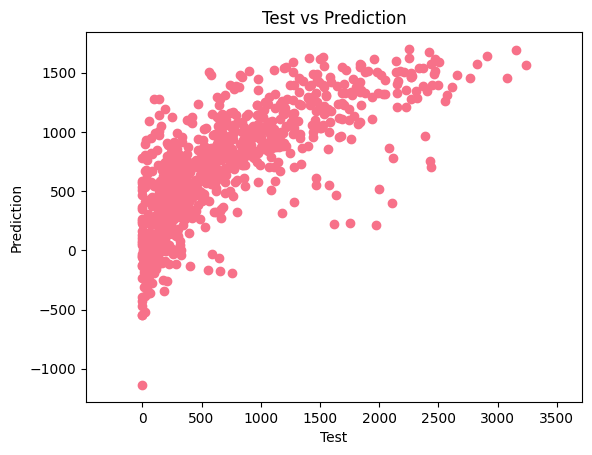

In [46]:
plt.scatter(y_test, y_pred)

plt.axis('equal')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Test vs Prediction')

plt.show()

Respecto a este gráfico, no hay un cambio destacable respecto a los modelos anteriores. Esto es esperable considerando que no hay variación significativa en el error cuadrático.

## 1.4 Conclusiones:

Es notable desde el gráfico de correlación que la variable objetivo _Rented Bike Count_ no tiene una gran correlación lineal con las características de los datos. En principio esperábamos que el modelo en bruto obtuviese los peores resultados y que fuesen mejorando a medida que se refinaran los datos. Esta mejora fue visible en el caso donde creamos nuevas características basadas en atributos de lógica cíclica y normalizando las otras. Pero, al momento de aplicar SGDRegressor se obtuvo un error más alto en comparación. Finalmente, al aplicar SGDRegressor junto con regularización, se obtuvo un mejor error que el caso anterior, pero inferior al error usando los datos en bruto. Todo lo anterior es además dependiente de la semilla utilizada al momento de dividir los conjuntos de entrenamiento y prueba.

En general, podemos decir que una regresión lineal no es la más adecuada para este caso de análisis, por eso en un futuro estudio sería recomendable utilizar otro tipo de regresor que se adapte mejor a los datos. 

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [ ]:
!kaggle datasets download -d uciml/mushroom-classification

/bin/bash: kaggle: command not found


In [ ]:
!unzip mushroom-classification.zip

unzip:  cannot find or open mushroom-classification.zip, mushroom-classification.zip.zip or mushroom-classification.zip.ZIP.


In [47]:
df = pd.read_csv('files/mushrooms.csv')

In [48]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [49]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


### 2.1.1 Exploración de features

> **a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.**
Es una columna con una única clase, la cual todos datos poseen, es decir, todos los champiñones tienen un tipo de velo "P". Por lo cual no entrega información útil.

<AxesSubplot: xlabel='veil-type', ylabel='count'>

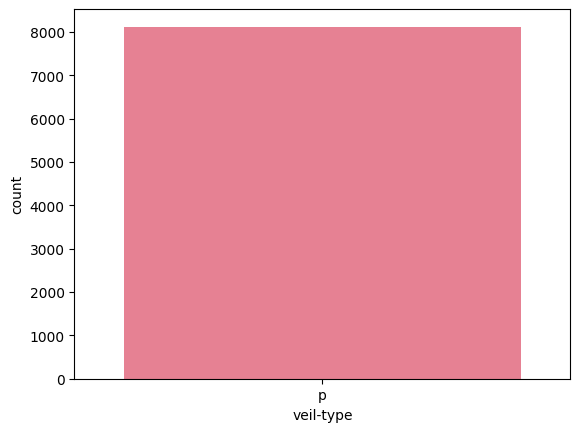

In [50]:
sns.countplot(x="veil-type", data=df)

In [51]:
df.drop('veil-type', axis=1, inplace=True)

> **b) Grafique la distribución de cada variable.**

/shared-libs/python3.9/py/lib/python3.9/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=figsize)


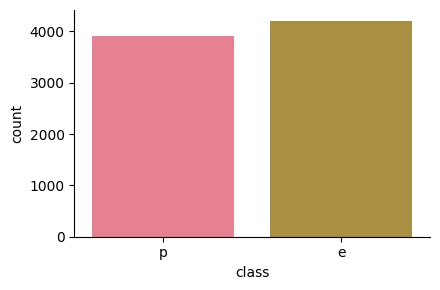

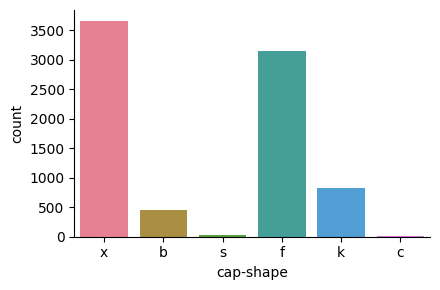

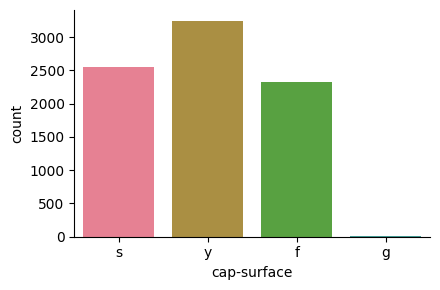

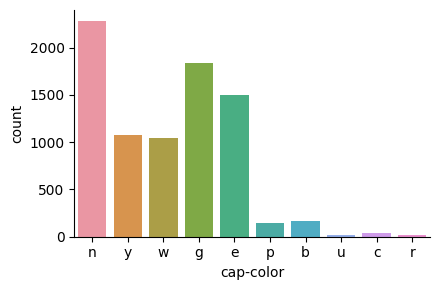

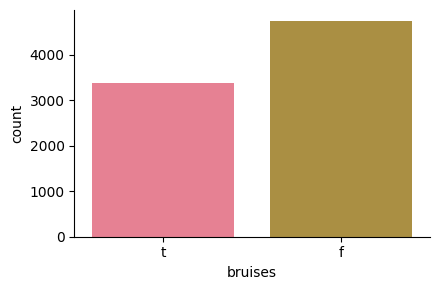

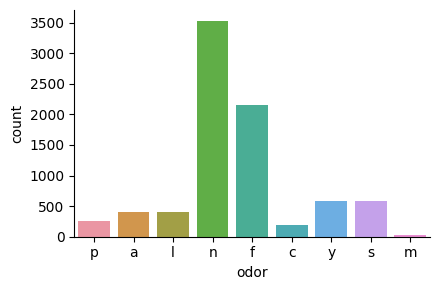

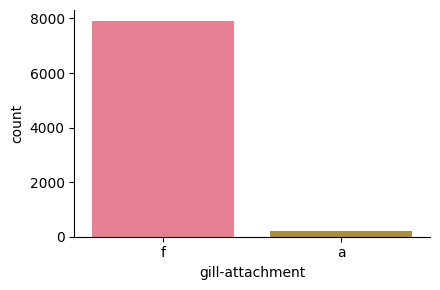

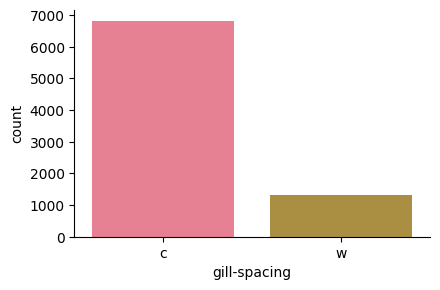

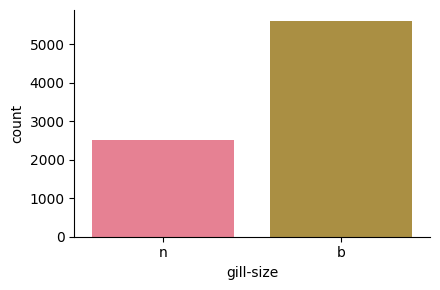

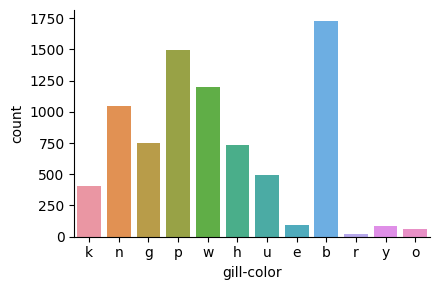

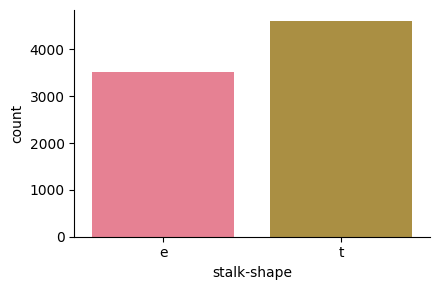

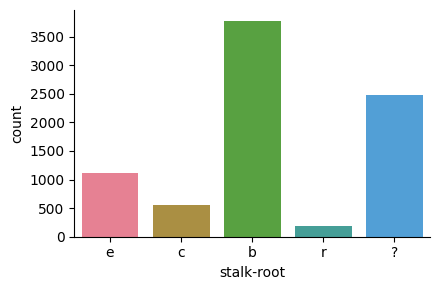

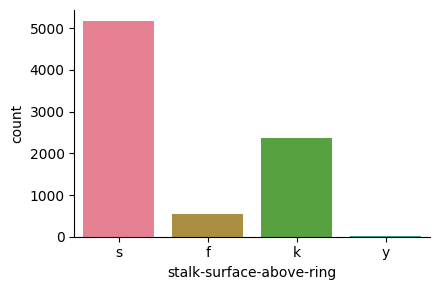

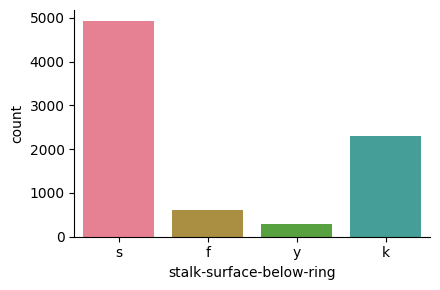

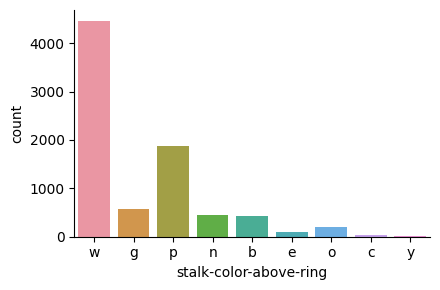

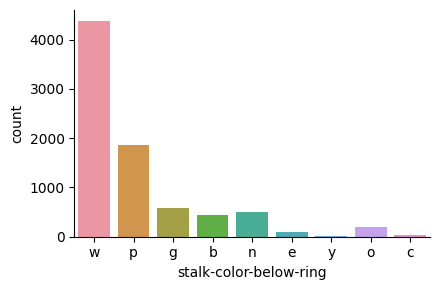

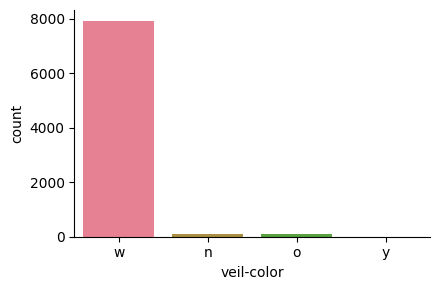

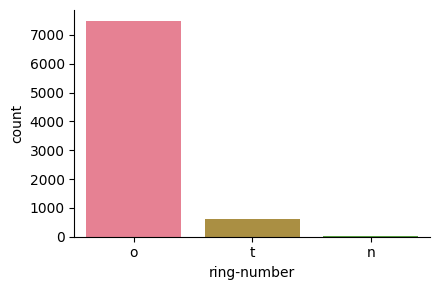

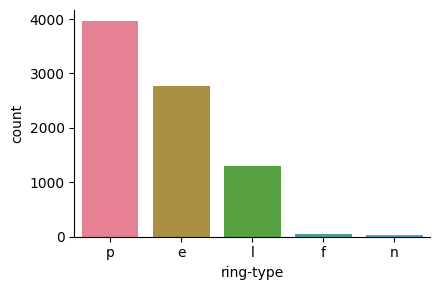

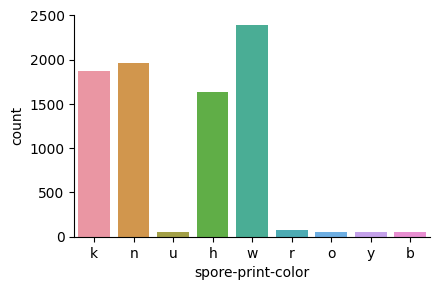

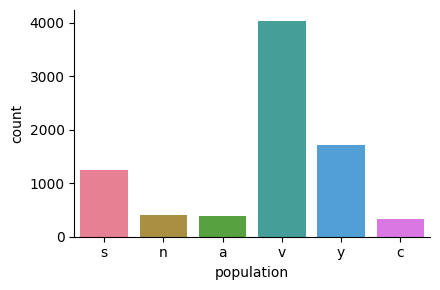

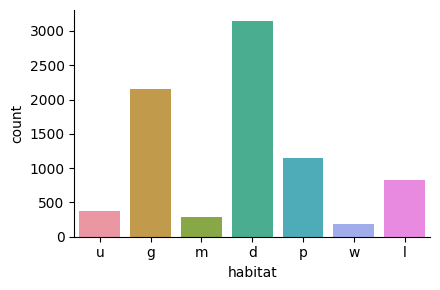

In [52]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)

> **c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.**

In [53]:
train_set = df.sample(frac=0.7, random_state=42)
test_set = df.drop(train_set.index)

> **d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.**

In [54]:
# create a list to store the columns to be dropped
drop_cols = []

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # convert binary variables to 0/1
        train_set[col] = pd.factorize(train_set[col])[0]
        test_set[col] = pd.factorize(test_set[col])[0]
    else:
        # get dummies for categorical variables with more than 2 categories
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)


Train set shape: (5687, 112)
Test set shape: (2437, 112)


> **e) Separe los subconjuntos en _X_ e _y_**

In [55]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> **a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".**

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [56]:
# n_features

n_features = X_train.shape[1]

n_features

111

In [57]:
# set k to the number of features you want to exclude
k = 1 
pca = PCA(n_components= n_features - k)
pca.fit(X_train)

X_train_pca_1 = pca.transform(X_train)
X_test_pca_1 = pca.transform(X_test)

In [58]:
# set k to the number of features you want to exclude
k = 10 
pca = PCA(n_components= n_features - k)
pca.fit(X_train)

X_train_pca_10 = pca.transform(X_train)
X_test_pca_10 = pca.transform(X_test)

In [60]:
# set k to the number of features you want to exclude
k = 50 
pca = PCA(n_components= n_features - k)
pca.fit(X_train)

X_train_pca_50 = pca.transform(X_train)
X_test_pca_50 = pca.transform(X_test)

In [61]:
X_train_pca = [X_train_pca_1, X_train_pca_10, X_train_pca_50]
X_test_pca = [X_test_pca_1, X_test_pca_10, X_test_pca_50]

### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> **a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.**



In [62]:
mi =mutual_info_classif(X_train, y_train)
mi

array([0.14025238, 0.00305184, 0.07261803, 0.15460415, 0.00748827,
       0.02866006, 0.        , 0.        , 0.01605192, 0.        ,
       0.        , 0.01968184, 0.        , 0.00160355, 0.        ,
       0.        , 0.00127558, 0.00298915, 0.00778894, 0.00666093,
       0.00377112, 0.0035798 , 0.        , 0.02128737, 0.00563807,
       0.03094937, 0.02267087, 0.24871336, 0.01763621, 0.00747169,
       0.36419198, 0.01958981, 0.05877309, 0.05277528, 0.18916438,
       0.00099978, 0.01237814, 0.0093806 , 0.00852926, 0.04500789,
       0.        , 0.00256516, 0.00895125, 0.01655061, 0.01574919,
       0.00690733, 0.04994435, 0.        , 0.01372203, 0.02558621,
       0.02171232, 0.01341753, 0.20200559, 0.13490475, 0.00132915,
       0.00384792, 0.19370679, 0.09245823, 0.00548519, 0.04014943,
       0.        , 0.00841488, 0.04945904, 0.04270755, 0.01961375,
       0.02379226, 0.02561351, 0.        , 0.03928053, 0.00708582,
       0.00565354, 0.0385101 , 0.01755043, 0.00213936, 0.03083

> **b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".**

In [63]:
k = [1, 10, 50]
selected_indices = []
for i in k:
  # compute the number of features to select
  n = len(mi) - i

  # get the indices of the features sorted by mutual information score
  sorted_indices = np.argsort(mi)

  # select the top n features
  selected_indices.append(sorted_indices[-n:])

selected_indices

[array([ 15,  14,  80,  12,  97,  10,  22,   9,   7,   6,  67,  47,  60,
         99,  40,  35, 107,  16,  54,  13,  73,  41,  17,   1,  21,  20,
         55,  58,  24,  70,  76,  89,  19, 106,  45,  69,  29,   4,  18,
         61,  38,  78,  42, 109,  37,  77,  81, 101,  93,  36,  94,  51,
        110,  48,  82,  95,  85,  44,   8,  43, 103,  72,  28,  31,  64,
         11,  79,  23, 105,  50,  84,  26, 104,  83,  65,  49,  66,   5,
         98,  75,  74,  25,  71,  68,  59,  63, 100,  39,  62,  46,  33,
         32, 108,  96,   2,  91,  57,  92, 102,  86,  53,   0,  90,   3,
         88,  34,  56,  52,  27,  30]),
 array([  6,  67,  47,  60,  99,  40,  35, 107,  16,  54,  13,  73,  41,
         17,   1,  21,  20,  55,  58,  24,  70,  76,  89,  19, 106,  45,
         69,  29,   4,  18,  61,  38,  78,  42, 109,  37,  77,  81, 101,
         93,  36,  94,  51, 110,  48,  82,  95,  85,  44,   8,  43, 103,
         72,  28,  31,  64,  11,  79,  23, 105,  50,  84,  26, 104,  83,
         65

In [64]:
X_train_mi_1 = X_train.iloc[:, selected_indices[0]]
X_test_mi_1 = X_test.iloc[:, selected_indices[0]]

X_train_mi_10 = X_train.iloc[:, selected_indices[1]]
X_test_mi_10 = X_test.iloc[:, selected_indices[1]]

X_train_mi_50 = X_train.iloc[:, selected_indices[2]]
X_test_mi_50 = X_test.iloc[:, selected_indices[2]]

X_train_mi = [X_train_mi_1, X_train_mi_10, X_train_mi_50]
X_test_mi = [X_test_mi_1, X_test_mi_10, X_test_mi_50]

## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

$$
\begin{aligned}
P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y) \\
\Downarrow \\
\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).
\end{aligned}
$$

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

$$
\begin{aligned}
P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)
\end{aligned}
$$

> **a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.**

Como los valores posibles que pueden asumir tanto las features como el target son 0 y 1 (es decir son binarios), una distribución que se puede utilizar sería la distribución de _Bernoulli_, donde se entraría a modelar la presencia o ausencia de una caracterísitca determinada.

Otra distribución que se podría utilizar sería la distribución _Binomial_, pero aquí se entraría a modelar el número de veces que ocurre una característica en una muestra de hongos de una clase del _target_ específica.

#### Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> **b) Entrene e clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.**

In [65]:
# Respuesta para la b)

clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred

array([0, 0, 1, ..., 1, 0, 0])

> **c) Entrene e clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.**

In [66]:
# Respuesta para la c)
y_pred_pca = [] # La posición indica si es para 1, 10 o 50
y_pred_mi = [] # La posición indica si es para 1, 10 o 50

# Entrenando los modelos con las representaciones de PCA
for rep in range(len(X_train_pca)):
    clf = GaussianNB()
    clf.fit(X_train_pca[rep], y_train)
    y_pred_pca.append(clf.predict(X_test_pca[rep]))


# Entrenando los modelos con las represetnaciones de Mutual Information
for rep in range(len(X_train_mi)):
    clf = GaussianNB()
    clf.fit(X_train_mi[rep], y_train)
    y_pred_mi.append(clf.predict(X_test_mi[rep]))

In [67]:
y_pred_pca

[array([1, 1, 1, ..., 1, 1, 1]),
 array([1, 1, 1, ..., 1, 1, 1]),
 array([0, 0, 0, ..., 1, 0, 0])]

In [68]:
y_pred_mi

[array([0, 0, 1, ..., 1, 0, 0]),
 array([0, 0, 1, ..., 1, 0, 0]),
 array([0, 0, 1, ..., 1, 0, 0])]

> **d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn**

In [69]:
# Para datos en bruto
print(classification_report(y_test, y_pred, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      0.97      0.99      1303
   poisonous       0.97      1.00      0.98      1134

    accuracy                           0.98      2437
   macro avg       0.98      0.99      0.98      2437
weighted avg       0.98      0.98      0.98      2437



In [70]:
# Para representaciones de PCA
names_pca = ["PCA con k=1", "PCA con k=10", "PCA con k=50"]

for i in range(len(X_train_pca)):
    print(names_pca[i])
    print(classification_report(y_test, y_pred_pca[i], target_names=['edible', 'poisonous']))
    print("=================")

PCA con k=1
              precision    recall  f1-score   support

      edible       1.00      0.03      0.06      1303
   poisonous       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg       0.75      0.48      0.33      2437

PCA con k=10
              precision    recall  f1-score   support

      edible       1.00      0.03      0.06      1303
   poisonous       0.47      1.00      0.64      1134

    accuracy                           0.48      2437
   macro avg       0.74      0.51      0.35      2437
weighted avg       0.75      0.48      0.33      2437

PCA con k=50
              precision    recall  f1-score   support

      edible       0.89      0.97      0.93      1303
   poisonous       0.96      0.87      0.91      1134

    accuracy                           0.92      2437
   macro avg       0.93      0.92      0.92      2437
weighted avg       0.92      0.92   

In [71]:
# Para representaciones de MI
names_mi = ["MI con k=1", "MI con k=10", "MI con k=50"]

for i in range(len(X_train_mi)):
    print(names_mi[i])
    print(classification_report(y_test, y_pred_mi[i], target_names=['edible', 'poisonous']))
    print("=================")

MI con k=1
              precision    recall  f1-score   support

      edible       1.00      0.91      0.96      1303
   poisonous       0.91      1.00      0.95      1134

    accuracy                           0.95      2437
   macro avg       0.95      0.96      0.95      2437
weighted avg       0.96      0.95      0.95      2437

MI con k=10
              precision    recall  f1-score   support

      edible       1.00      0.98      0.99      1303
   poisonous       0.97      1.00      0.99      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.99      0.99      2437
weighted avg       0.99      0.99      0.99      2437

MI con k=50
              precision    recall  f1-score   support

      edible       0.98      0.98      0.98      1303
   poisonous       0.98      0.98      0.98      1134

    accuracy                           0.98      2437
   macro avg       0.98      0.98      0.98      2437
weighted avg       0.98      0.98      

> **e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.**

Mutual Information con **k=10**. Conserva los buenos resultados de los otros modelos, con la ventaja que tiene menos features.

> **f) Muestre los errores tipo 1 y tipo 2.**

Tipo 1 = Falso positivo
Tipo 2 = Falso negativo

<AxesSubplot: >

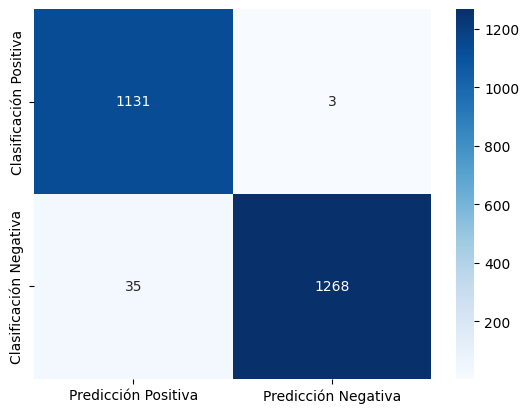

In [72]:
# Para datos en bruto

# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fn], [fp, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicción Positiva', 'Predicción Negativa'], yticklabels=['Clasificación Positiva', 'Clasificación Negativa'])


PCA con k=1


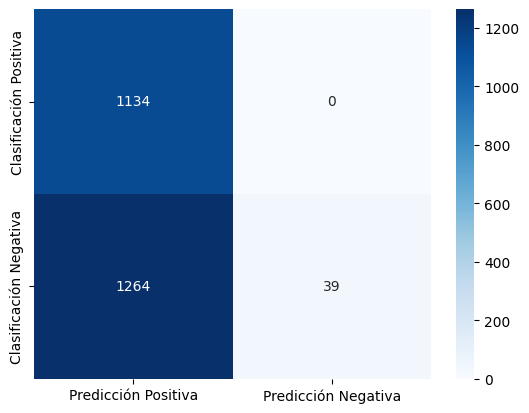

PCA con k=10


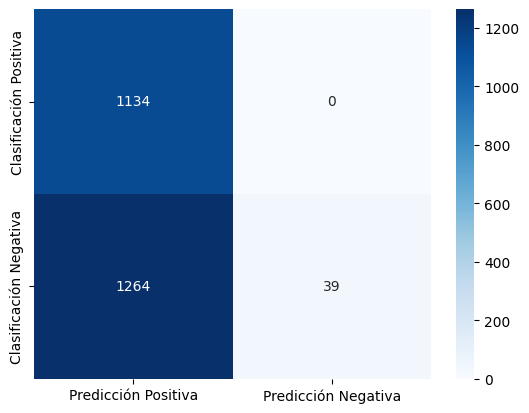

PCA con k=50


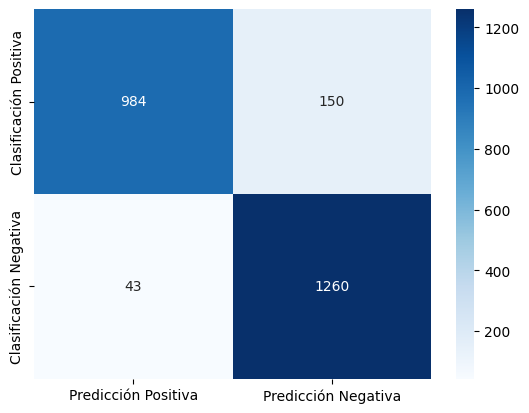

In [73]:
# Para representaciones de PCA
for i in range(len(X_train_pca)):
    print(names_pca[i])
    # assume you have a classification report saved in the variable `report`
    cm = confusion_matrix(y_test, y_pred_pca[i])  # replace y_true and y_pred with your actual true and predicted labels

    # extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # create a 2x2 matrix of the type 1 and type 2 errors
    error_matrix = [[tp, fn], [fp, tn]]

    # plot the heatmap using seaborn
    sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicción Positiva', 'Predicción Negativa'], yticklabels=['Clasificación Positiva', 'Clasificación Negativa'])
    plt.show()

MI con k=1


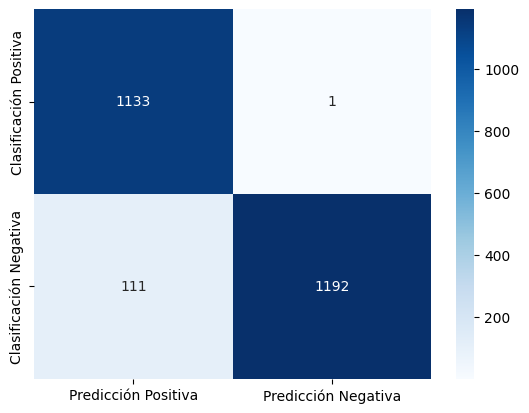

MI con k=10


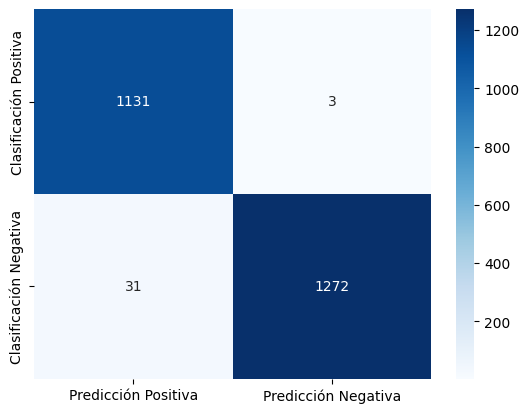

MI con k=50


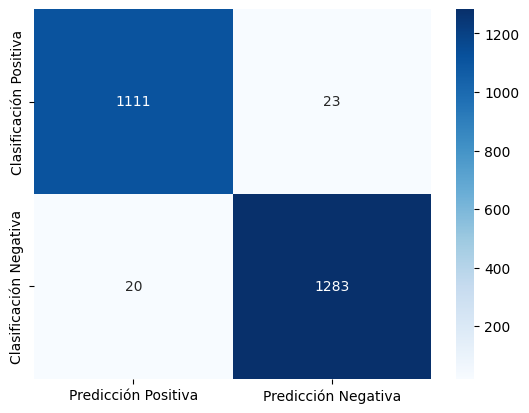

In [74]:
# Para representaciones de MI
for i in range(len(X_train_mi)):
    print(names_mi[i])
    # assume you have a classification report saved in the variable `report`
    cm = confusion_matrix(y_test, y_pred_mi[i])  # replace y_true and y_pred with your actual true and predicted labels

    # extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # create a 2x2 matrix of the type 1 and type 2 errors
    error_matrix = [[tp, fn], [fp, tn]]

    # plot the heatmap using seaborn
    sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicción Positiva', 'Predicción Negativa'], yticklabels=['Clasificación Positiva', 'Clasificación Negativa'])
    plt.show()

### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.


> **a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?**

El modelo LDA asume que la distribución condicional de la clases sigue una distribución gaussiana.

>**b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?**

El modelo LDA asume que las matrices de covarianza de la distribución condicional son iguales para todas las clases.

> **c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.**

In [75]:
X_train_chosen = X_train_mi_10
X_test_chosen = X_test_mi_10

In [76]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_chosen, y_train)
y_pred_LDA = clf.predict(X_test_chosen)

y_pred_LDA

array([0, 0, 1, ..., 1, 0, 0])

> **d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn**

In [77]:
print(classification_report(y_test, y_pred_LDA, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       1.00      1.00      1.00      1303
   poisonous       1.00      1.00      1.00      1134

    accuracy                           1.00      2437
   macro avg       1.00      1.00      1.00      2437
weighted avg       1.00      1.00      1.00      2437



> **e) Muestre los errores tipo 1 y tipo 2.**

<AxesSubplot: >

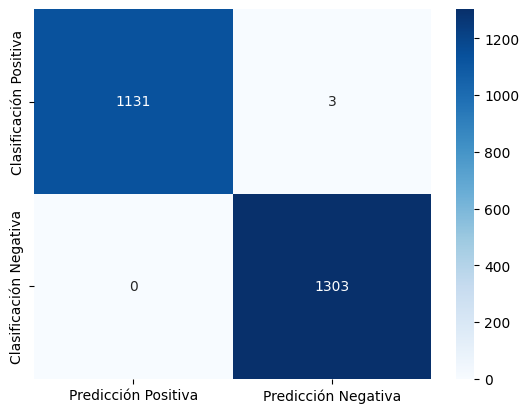

In [78]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_LDA)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fn], [fp, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicción Positiva', 'Predicción Negativa'], yticklabels=['Clasificación Positiva', 'Clasificación Negativa'])


### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> **a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?**

Consiste en determinar los coeficientes de la función logística a través de la obtención de los $\beta$ que **maximizan** la función de verosimilitud o la de log-verosimilitud. Para la determinación de los coeficientes se puede hacer uso de un método como el _Stochastic Gradient Ascent_.

> **b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?**

Asume que se relacionan a través de la función logística, expresada a continuación:

$f_{\beta}(x) = \dfrac{1}{1 + e-^{-\beta^{T} x}}$

Donde $f_{\beta}(x)$ correspondería a la predicción de la variable objetivo a partir de los coeficientes $\beta^{T}$ y vector de características $x$.

> **c) ¿Qué se hace para evitar el sobreajuste de este modelo?**

Para evitar el sobreajuste se pueden utilizar **regularizadores** para, de esta forma, añadir un término penalizador para alguna medida de complejidad del modelo. Otro camino (no excluyente) puede ser el uso de variantes de **Cross Validation** para así evaluar el rendimiento del modelo ante datos no vistos. También se puede hacer uso de técnicas de **Feature Extraction y/o Selection**, con el objetivo de reducir la complejidad del modelo.

> **d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.**

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [79]:
clf = LogisticRegression()
clf.fit(X_train_chosen, y_train)

y_pred_RL = clf.predict(X_test_chosen)

y_pred_RL

array([0, 0, 1, ..., 1, 0, 0])

> **e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn**

In [80]:
print(classification_report(y_test, y_pred_RL, target_names=['edible', 'poisonous']))

              precision    recall  f1-score   support

      edible       0.98      0.99      0.99      1303
   poisonous       0.99      0.98      0.98      1134

    accuracy                           0.99      2437
   macro avg       0.99      0.99      0.99      2437
weighted avg       0.99      0.99      0.99      2437



> **f) Muestre los errores tipo 1 y tipo 2.**

<AxesSubplot: >

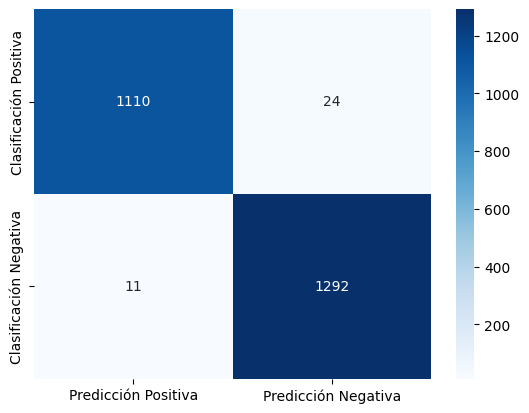

In [81]:
# assume you have a classification report saved in the variable `report`
cm = confusion_matrix(y_test, y_pred_RL)  # replace y_true and y_pred with your actual true and predicted labels

# extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# create a 2x2 matrix of the type 1 and type 2 errors
error_matrix = [[tp, fn], [fp, tn]]

# plot the heatmap using seaborn
sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicción Positiva', 'Predicción Negativa'], yticklabels=['Clasificación Positiva', 'Clasificación Negativa'])


### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_:

In [82]:
gamma = ["scale", "auto"]

> **a) Lineal, con 2 valores del coeficiente gamma distintos.**

In [83]:
# Pregunta a)

y_pred_SVM_linear = []
for i in gamma:
    clf = NuSVC(kernel='linear', gamma=i)
    clf.fit(X_train_chosen, y_train)
    y_pred_SVM_linear.append(clf.predict(X_test_chosen))

y_pred_SVM_linear


[array([0, 0, 0, ..., 1, 0, 0]), array([0, 0, 0, ..., 1, 0, 0])]

> **b) Polinómico, con 2 valores del coeficiente gamma distintos.**

In [84]:
# Pregunta b)

y_pred_SVM_poly = []
for i in gamma:
    clf = NuSVC(kernel='poly', gamma=i)
    clf.fit(X_train_chosen, y_train)
    y_pred_SVM_poly.append(clf.predict(X_test_chosen))

y_pred_SVM_poly


[array([0, 0, 0, ..., 1, 0, 0]), array([0, 0, 0, ..., 1, 0, 0])]

> **c) rbf, con 2 valores del coeficiente gamma distintos.**

In [85]:
# Pregunta c)

y_pred_SVM_rbf = []
for i in gamma:
    clf = NuSVC(kernel='rbf', gamma=i)
    clf.fit(X_train_chosen, y_train)
    y_pred_SVM_rbf.append(clf.predict(X_test_chosen))

y_pred_SVM_rbf


[array([0, 0, 0, ..., 1, 0, 0]), array([0, 0, 0, ..., 1, 0, 0])]

> **d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn**

In [86]:
# Para kernel lineal

for i in range(len(gamma)):
    print(f"Kernel Lineal y gamma = {gamma[i]}")
    print(classification_report(y_test, y_pred_SVM_linear[i], target_names=['edible', 'poisonous']))
    print("=================")

Kernel Lineal y gamma = scale
              precision    recall  f1-score   support

      edible       0.86      1.00      0.92      1303
   poisonous       1.00      0.81      0.89      1134

    accuracy                           0.91      2437
   macro avg       0.93      0.90      0.91      2437
weighted avg       0.92      0.91      0.91      2437

Kernel Lineal y gamma = auto
              precision    recall  f1-score   support

      edible       0.86      1.00      0.92      1303
   poisonous       1.00      0.81      0.89      1134

    accuracy                           0.91      2437
   macro avg       0.93      0.90      0.91      2437
weighted avg       0.92      0.91      0.91      2437



In [87]:
# Para kernel polinomico

for i in range(len(gamma)):
    print(f"Kernel Polinomico y gamma = {gamma[i]}")
    print(classification_report(y_test, y_pred_SVM_poly[i], target_names=['edible', 'poisonous']))
    print("=================")

Kernel Polinomico y gamma = scale
              precision    recall  f1-score   support

      edible       0.88      1.00      0.93      1303
   poisonous       1.00      0.84      0.91      1134

    accuracy                           0.93      2437
   macro avg       0.94      0.92      0.92      2437
weighted avg       0.93      0.93      0.92      2437

Kernel Polinomico y gamma = auto
              precision    recall  f1-score   support

      edible       0.88      1.00      0.93      1303
   poisonous       1.00      0.84      0.91      1134

    accuracy                           0.93      2437
   macro avg       0.94      0.92      0.92      2437
weighted avg       0.93      0.93      0.92      2437



In [88]:
# Para kernel RBF

for i in range(len(gamma)):
    print(f"Kernel RBF y gamma = {gamma[i]}")
    print(classification_report(y_test, y_pred_SVM_rbf[i], target_names=['edible', 'poisonous']))
    print("=================")

Kernel RBF y gamma = scale
              precision    recall  f1-score   support

      edible       0.87      1.00      0.93      1303
   poisonous       1.00      0.82      0.90      1134

    accuracy                           0.92      2437
   macro avg       0.93      0.91      0.92      2437
weighted avg       0.93      0.92      0.92      2437

Kernel RBF y gamma = auto
              precision    recall  f1-score   support

      edible       0.86      1.00      0.92      1303
   poisonous       1.00      0.81      0.90      1134

    accuracy                           0.91      2437
   macro avg       0.93      0.91      0.91      2437
weighted avg       0.92      0.91      0.91      2437



> **e) Muestre los errores tipo 1 y tipo 2.**

Kernel Lineal y gamma = scale


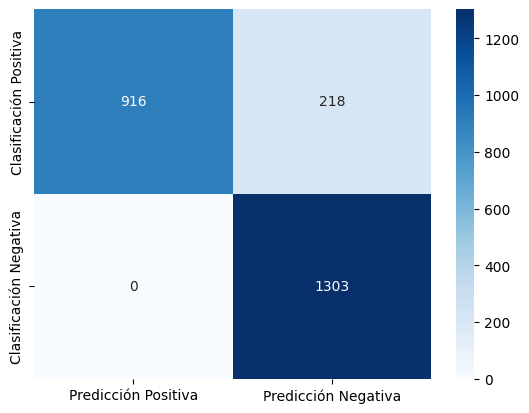

Kernel Lineal y gamma = auto


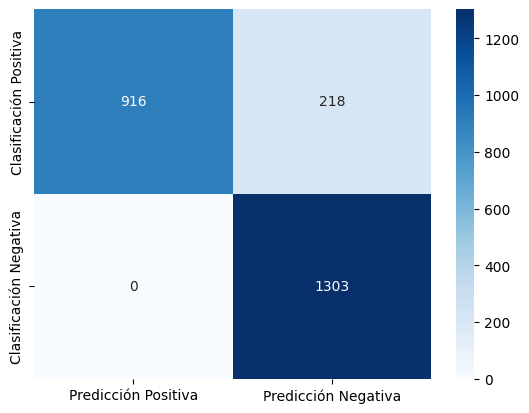

In [89]:
# Para Kernel Lineal
for i in range(len(gamma)):
    print(f"Kernel Lineal y gamma = {gamma[i]}")
    # assume you have a classification report saved in the variable `report`
    cm = confusion_matrix(y_test, y_pred_SVM_linear[i])  # replace y_true and y_pred with your actual true and predicted labels

    # extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # create a 2x2 matrix of the type 1 and type 2 errors
    error_matrix = [[tp, fn], [fp, tn]]

    # plot the heatmap using seaborn
    sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicción Positiva', 'Predicción Negativa'], yticklabels=['Clasificación Positiva', 'Clasificación Negativa'])
    plt.show()

Kernel Polinomico y gamma = scale


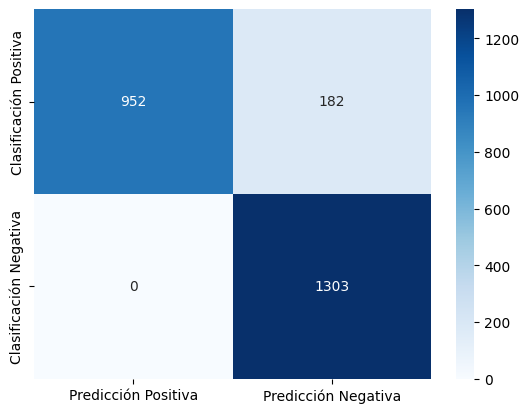

Kernel Polinomico y gamma = auto


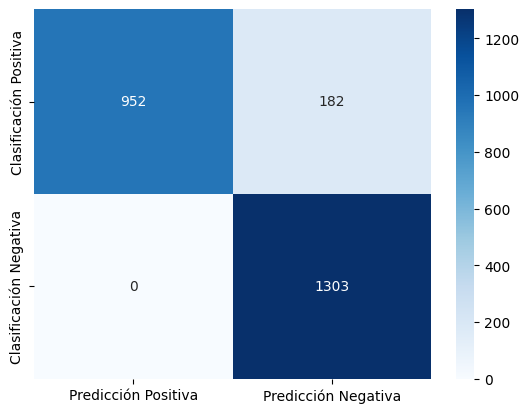

In [90]:
# Para Kernel Polinomico
for i in range(len(gamma)):
    print(f"Kernel Polinomico y gamma = {gamma[i]}")
    # assume you have a classification report saved in the variable `report`
    cm = confusion_matrix(y_test, y_pred_SVM_poly[i])  # replace y_true and y_pred with your actual true and predicted labels

    # extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # create a 2x2 matrix of the type 1 and type 2 errors
    error_matrix = [[tp, fn], [fp, tn]]

    # plot the heatmap using seaborn
    sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicción Positiva', 'Predicción Negativa'], yticklabels=['Clasificación Positiva', 'Clasificación Negativa'])
    plt.show()

Kernel RBF y gamma = scale


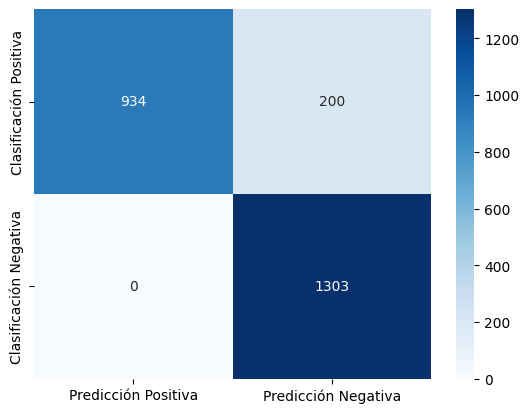

Kernel RBF y gamma = auto


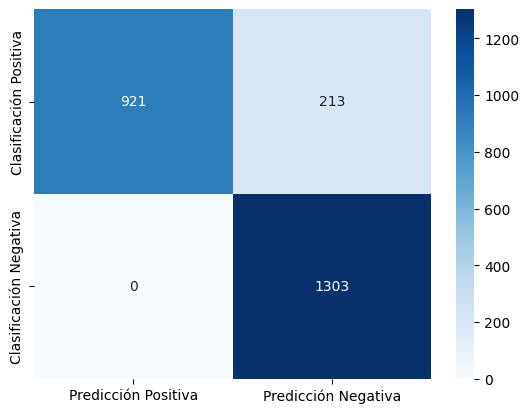

In [91]:
# Para Kernel RBF
for i in range(len(gamma)):
    print(f"Kernel RBF y gamma = {gamma[i]}")
    # assume you have a classification report saved in the variable `report`
    cm = confusion_matrix(y_test, y_pred_SVM_rbf[i])  # replace y_true and y_pred with your actual true and predicted labels

    # extract the true positive, false positive, false negative, and true negative counts from the confusion matrix
    tn, fp, fn, tp = cm.ravel()

    # create a 2x2 matrix of the type 1 and type 2 errors
    error_matrix = [[tp, fn], [fp, tn]]

    # plot the heatmap using seaborn
    sns.heatmap(error_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=['Predicción Positiva', 'Predicción Negativa'], yticklabels=['Clasificación Positiva', 'Clasificación Negativa'])
    plt.show()

## 2.3 Conclusiones:

A través del dataset entregado para esta punto, se pudo observar el rendimiento de diferentes tipos de técnicas para generar modelos de predicción. Tal como se puede observar, hay modelos que tienen muy buenos resultados y otros que no. 

Es de destacar que al utilizar Naïve Bayes como primer modelo, con los datos en bruto se obtuvieron muy buenos resultados. Sin embargo, esto no se replicó al utilizar PCA, siendo que obtuvo las peores métricas resultantes.

Mutual Information, por su parte, fue el que obtuvo los mejores resultados en el primer modelo. Es por esto que fue seleccionada esta representación para ser utilizada en los posteriores modelos. En específico, se seleccionó la representación con k=10.

Dentro de los tres modelos predictivos utilizados (LDA, Regresión Logística, SVM) el que generó los mejores resultados fue LDA, lo cual se refleja en la matriz de confusión casi perfecta obtenida. Además, se puede decir que un modelo más robusto no siempre es la solución a todos los problemas. De hecho, para este dataset, SVM (el cual consideramos un modelo robusto) entregó resultados inferiores respecto a los otros modelos.

Teniendo en consideración la complejidad de los modelos utilizados, este grupo, en la sección de seleccionar la mejor representación a utilizar, hubiese elegido la representación de Mutual Information con k=50 ya que, a pesar de no haber sido la que obtuvo los mejores resultados con Naïve Bayes, es una representación mucho más liviana que la que se utilizó finalmente y que obtiene resultados relativamente buenos.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bed2dede-1072-44ae-a77b-a35b61b3ff46' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>